### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Assignment: COVID-19 data

# Part 1: Scenario and system set up

## Main scenario - questions to be answered

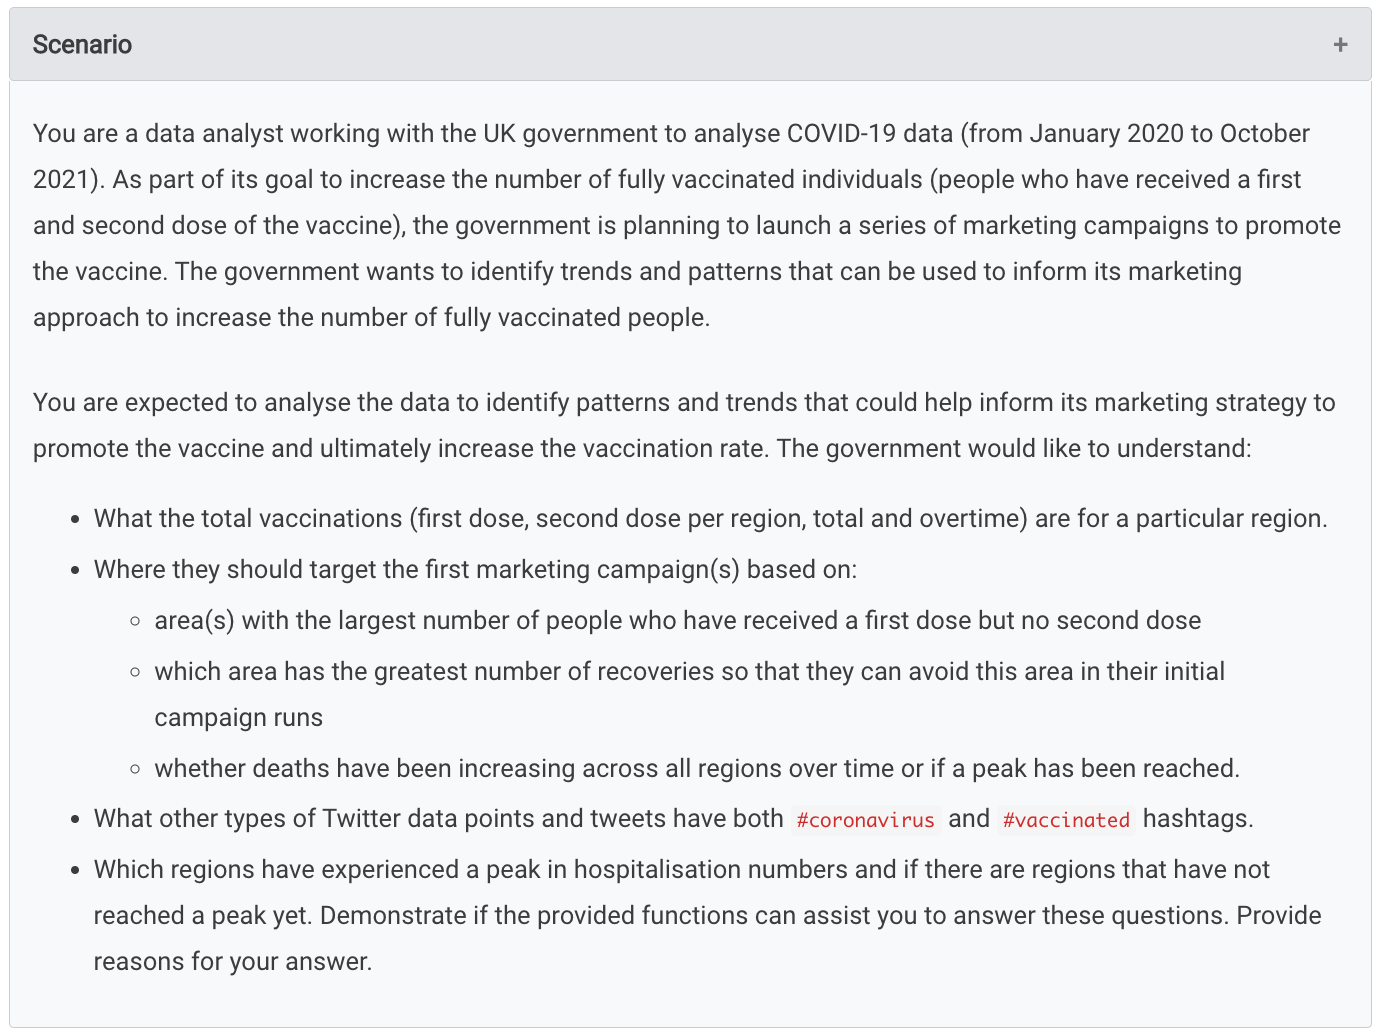

### ***Note to evaluators/stakeholders: most of the full tables intended to be displayed/printed have been reduced with .head()/.tails() to maximise efficiency and size when running this Notebook. Please re-run the code without them in case any particular block or table needs to be viewed in full.

### Thank you.


##  Environment preparation

In [301]:
# Import the required libraries and set the plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,10)})

- [My Github Repo](https://github.com/JavierConde1976/LSE_DA_COVID_analysis)

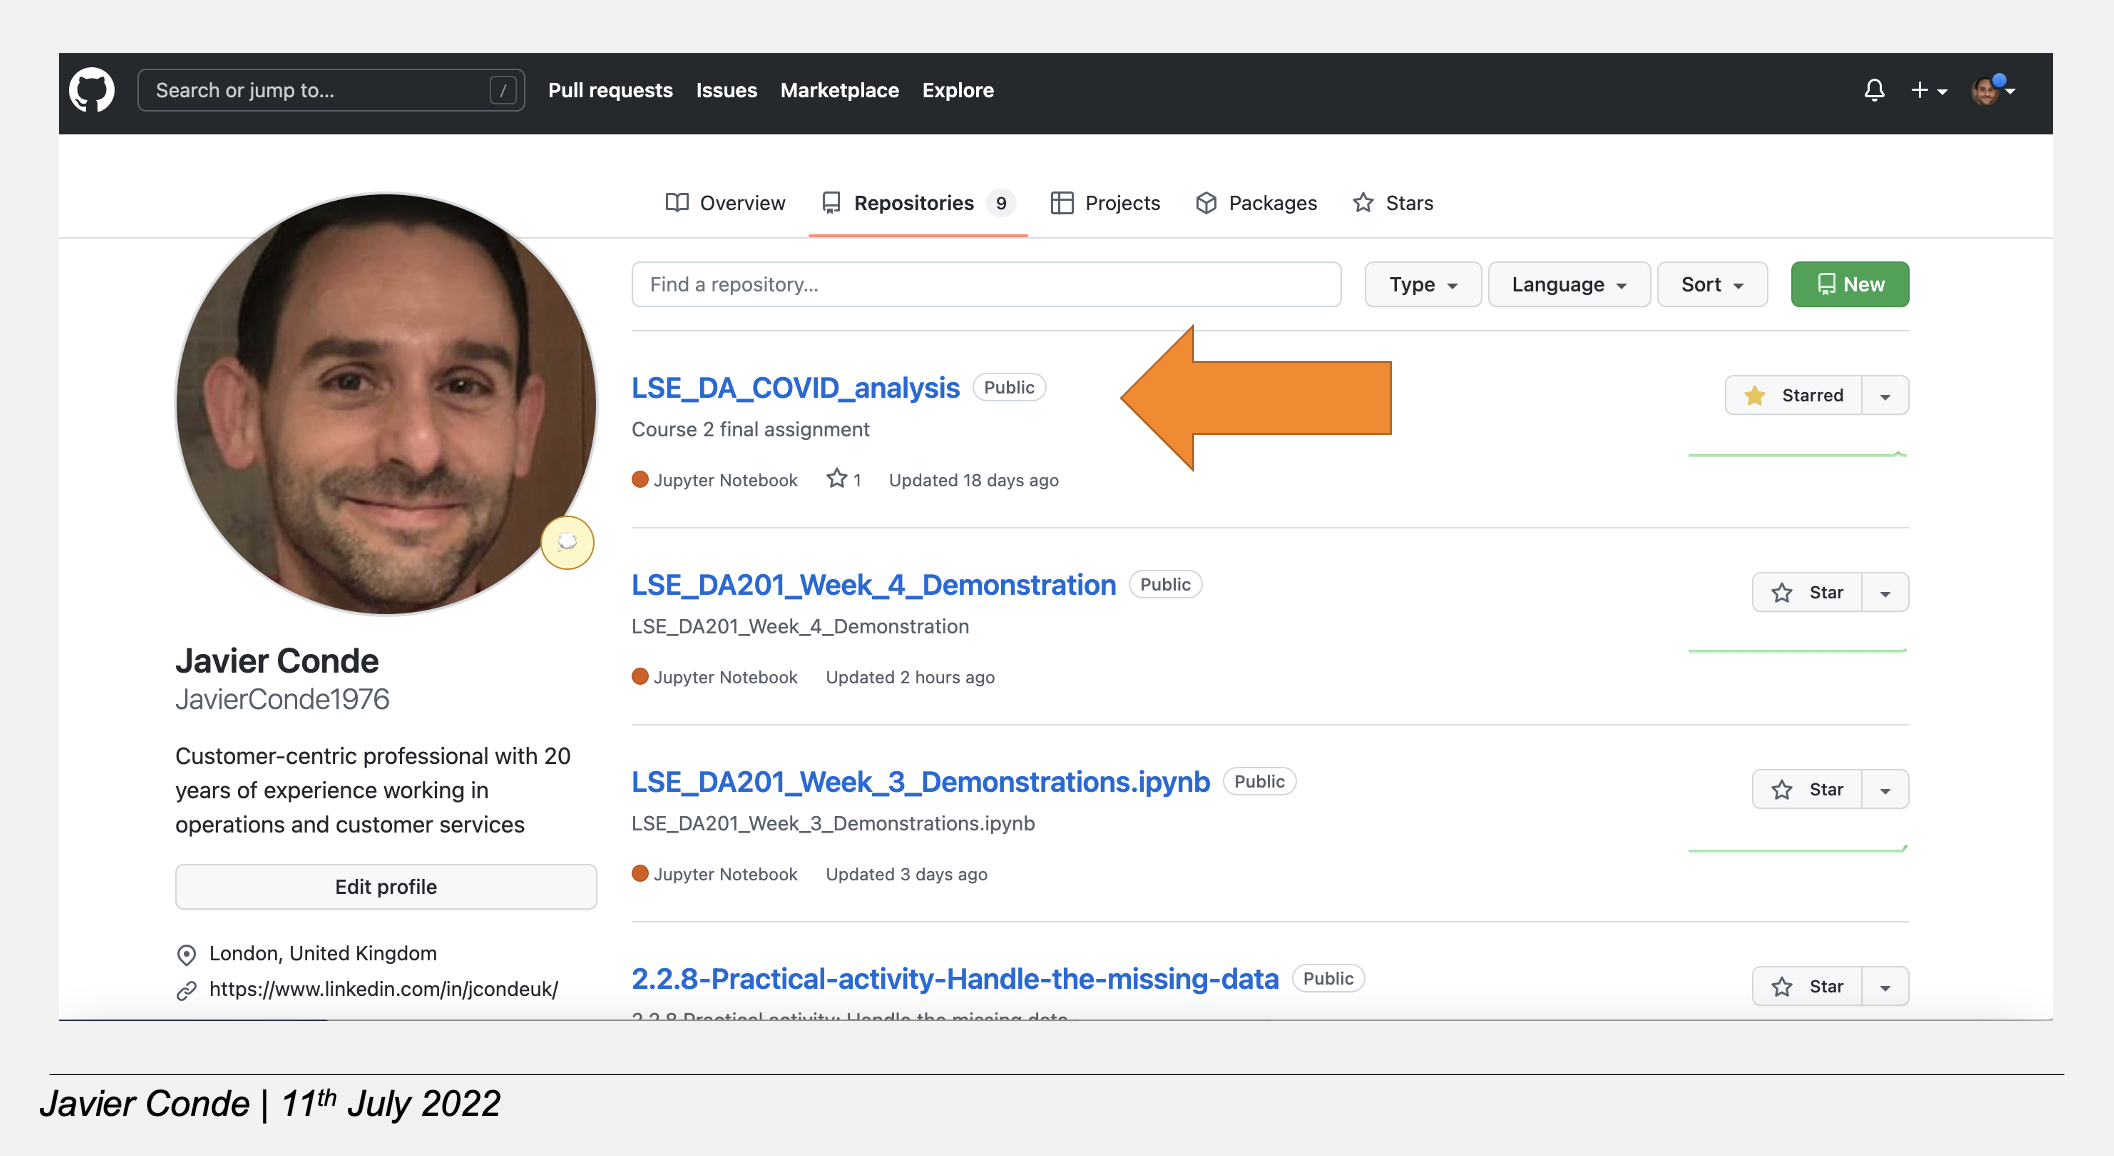

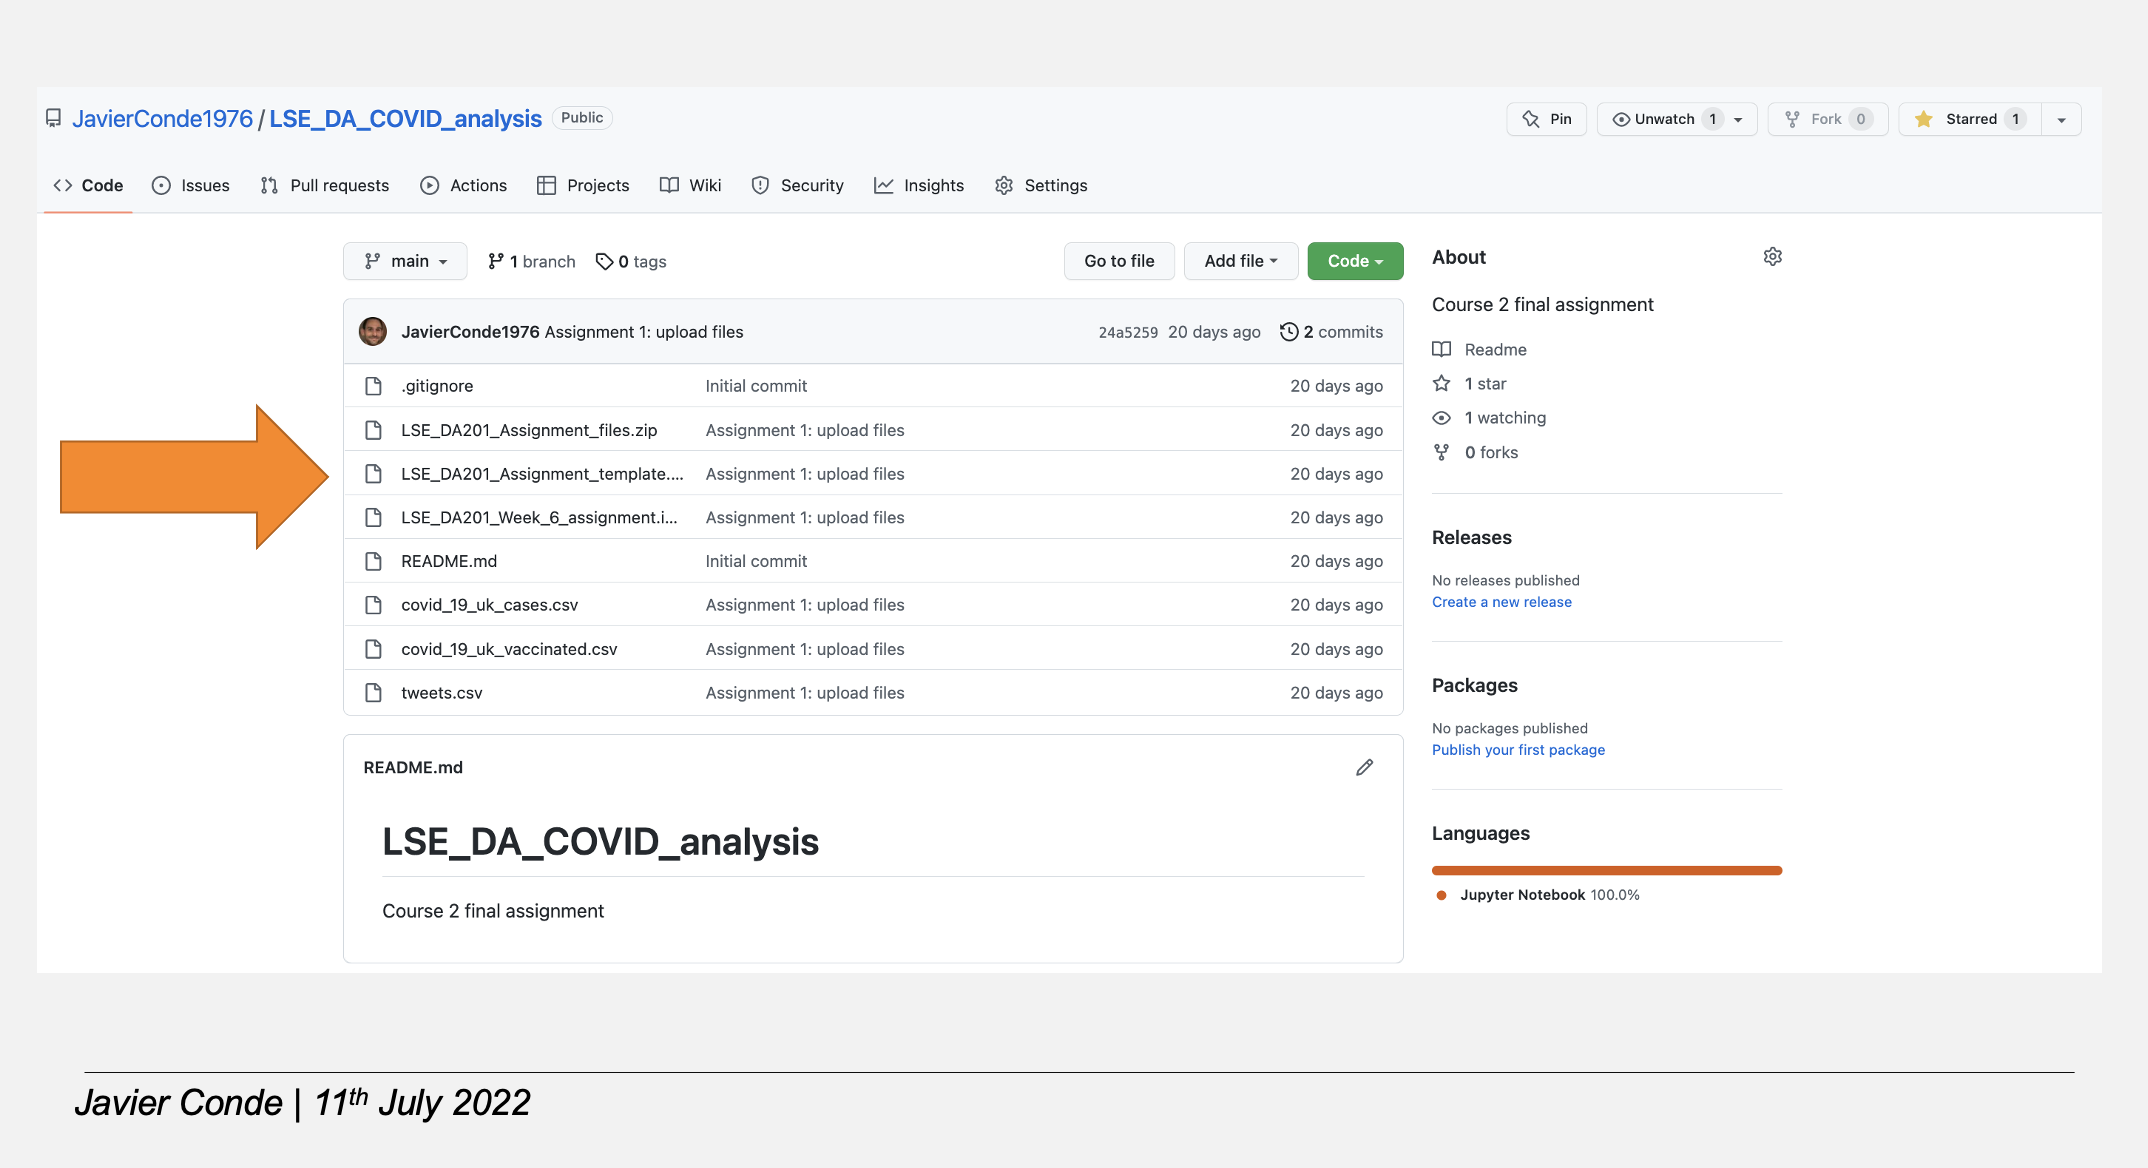

### GitHub can add solid and measurable value to organisations.

In the role of data analyst working with the UK government to analyse COVID-19 data, having reliable repositories to control accurately the different versions and add ons to the code is essential in the day to day work. Change control management. As a Distributed CVS, Github will help us to control the overall progression of the worl, the different steps we are accomplising along the way and any changes we make to the original Python code block.

# Part 2: First approach and insights to provided data

In [292]:
# Load the COVID-19 cases and vaccine data sets as cov and vac respectively.

### To start understanding the campaign strategy, let's identify:

- the number of people who have received a first dose
- the number of people who have received a second dose
- the number of people vaccinated in a particular region.

In [2]:
# Let's load the COVID-19 cases and vaccine data sets as cov and vac respectively.
cov = pd.read_csv('covid_19_uk_cases.csv')
vac = pd.read_csv('covid_19_uk_vaccinated.csv')

In [3]:
# We explore first the 'cov' DataFrame (with 'shape', 'dtypes','columns', 'head', 'tail' arguments).

print(cov.shape)
print(cov.dtypes)
print(cov.columns)
cov.head()

(7584, 12)
Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object
Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised'],
      dtype='object')


Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Deaths  Cases  Recovered  Hospitalised  
0     0.0    0.0        0.0           0.0  
1     0.0    0.0        0.0           0.0  
2     0.0    0.0        0.0           0.0  
3     0.0    0.0        0.0           0.0  
4     0.0    0.0        0.0           0.0

In [295]:
cov.tail()

Province/State  Country/Region      Lat   Long ISO 3166-1 Alpha 3-Codes  \
7579         Others  United Kingdom  55.3781 -3.436                      GBR   
7580         Others  United Kingdom  55.3781 -3.436                      GBR   
7581         Others  United Kingdom  55.3781 -3.436                      GBR   
7582         Others  United Kingdom  55.3781 -3.436                      GBR   
7583         Others  United Kingdom  55.3781 -3.436                      GBR   

      Sub-region Name  Intermediate Region Code        Date    Deaths  \
7579  Northern Europe                         0  2021-10-10  137735.0   
7580  Northern Europe                         0  2021-10-11  137763.0   
7581  Northern Europe                         0  2021-10-12  137944.0   
7582  Northern Europe                         0  2021-10-13  138080.0   
7583  Northern Europe                         0  2021-10-14  138237.0   

          Cases  Recovered  Hospitalised  
7579  8154306.0        0.0         378.0  
7580  8193769.0        0.0         386.0  
7581  8231437.0        0.0         386.0  
7582  8272883.0        0.0           0.0  
7583  8317439.0        0.0           0.0

In [5]:
# Being data cumulative per region, let's group by province to get an overview on the max values

cov.groupby('Province/State')[['Deaths', 'Cases', 'Recovered', 'Hospitalised']].max()

Deaths      Cases  Recovered  \
Province/State                                                                 
Anguilla                                           1.0      644.0      111.0   
Bermuda                                           95.0     5548.0     2503.0   
British Virgin Islands                            37.0     2725.0     1914.0   
Cayman Islands                                     2.0     1011.0      635.0   
Channel Islands                                  100.0    12135.0     8322.0   
Falkland Islands (Malvinas)                        0.0       69.0       63.0   
Gibraltar                                         97.0     5727.0     4670.0   
Isle of Man                                       54.0     8343.0     4019.0   
Montserrat                                         1.0       41.0       19.0   
Others                                        138237.0  8317439.0      344.0   
Saint Helena, Ascension and Tristan da Cunha       1.0        4.0        4.0   
Turks and Caicos Islands                          23.0     2910.0     2433.0   

                                              Hospitalised  
Province/State                                              
Anguilla                                            4122.0  
Bermuda                                             2355.0  
British Virgin Islands                              4318.0  
Cayman Islands                                      2944.0  
Channel Islands                                     2748.0  
Falkland Islands (Malvinas)                         3140.0  
Gibraltar                                           4907.0  
Isle of Man                                         3533.0  
Montserrat                                          4514.0  
Others                                              2159.0  
Saint Helena, Ascension and Tristan da Cunha        1963.0  
Turks and Caicos Islands                            2552.0

In [6]:
# Let's find empty values in 'cov' DataFrame.

print(cov.isnull().values.any())
print(cov.isnull().sum().sum())

True
8


In [7]:
# 'cov' DataFrame does have 8 empty values NaN.

In [8]:
# Now let's explore the 'vac' DataFrame with 'shape', 'dtypes','columns', 'head', 'tail' arguments

print(vac.shape)
print(vac.dtypes)
print(vac.columns)
print(vac.head())
print(vac.tail())

(7584, 11)
Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object
Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Vaccinated', 'First Dose',
       'Second Dose'],
      dtype='object')
  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  1

In [9]:
# Exploring if any empty values in cov DataFrame.

print(vac.isnull().values.any())
print(vac.isnull().sum().sum())

False
0


In [ ]:
# vac DataFrame does not have any empty values NaN.

In [10]:
vac.tail()

Province/State  Country/Region      Lat   Long ISO 3166-1 Alpha 3-Codes  \
7579         Others  United Kingdom  55.3781 -3.436                      GBR   
7580         Others  United Kingdom  55.3781 -3.436                      GBR   
7581         Others  United Kingdom  55.3781 -3.436                      GBR   
7582         Others  United Kingdom  55.3781 -3.436                      GBR   
7583         Others  United Kingdom  55.3781 -3.436                      GBR   

      Sub-region Name  Intermediate Region Code        Date  Vaccinated  \
7579  Northern Europe                         0  2021-10-10        1070   
7580  Northern Europe                         0  2021-10-11        1300   
7581  Northern Europe                         0  2021-10-12        1482   
7582  Northern Europe                         0  2021-10-13           0   
7583  Northern Europe                         0  2021-10-14           0   

      First Dose  Second Dose  
7579        1216         1070  
7580        1604         1300  
7581        2027         1482  
7582           0            0  
7583           0            0

In [11]:
# Let's explore a particular region: Gibraltar building a DataFrame based on thisdata.
# First let's find if the province 'Gibraltar' is in the column Province/State.
cov['Province/State'].unique()

array(['Anguilla', 'Bermuda', 'British Virgin Islands', 'Cayman Islands',
       'Channel Islands', 'Falkland Islands (Malvinas)', 'Gibraltar',
       'Isle of Man', 'Montserrat',
       'Saint Helena, Ascension and Tristan da Cunha',
       'Turks and Caicos Islands', 'Others'], dtype=object)

In [12]:
# 'Gibraltar' does appear in column 'Province/State'. Now let's filter the DataFrame by value 'Gibraltar'
cov_gibraltar = (cov[cov['Province/State']=='Gibraltar'])
cov_gibraltar.tail()

Province/State  Country/Region      Lat    Long ISO 3166-1 Alpha 3-Codes  \
4419      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4420      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4421      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4422      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4423      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   

      Sub-region Name  Intermediate Region Code        Date  Deaths   Cases  \
4419  Southern Europe                         0  2021-10-10    97.0  5626.0   
4420  Southern Europe                         0  2021-10-11    97.0  5655.0   
4421  Southern Europe                         0  2021-10-12    97.0  5682.0   
4422  Southern Europe                         0  2021-10-13    97.0  5707.0   
4423  Southern Europe                         0  2021-10-14    97.0  5727.0   

      Recovered  Hospitalised  
4419        0.0         858.0  
4420        0.0         876.0  
4421        0.0         876.0  
4422        0.0           0.0  
4423        0.0           0.0

In [13]:
print(cov_gibraltar.shape)
print(cov_gibraltar.dtypes)
cov_gibraltar.head()

(632, 12)
Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object


Province/State  Country/Region      Lat    Long ISO 3166-1 Alpha 3-Codes  \
3792      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
3793      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
3794      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
3795      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
3796      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   

      Sub-region Name  Intermediate Region Code        Date  Deaths  Cases  \
3792  Southern Europe                         0  2020-01-22     0.0    0.0   
3793  Southern Europe                         0  2020-01-23     0.0    0.0   
3794  Southern Europe                         0  2020-01-24     0.0    0.0   
3795  Southern Europe                         0  2020-01-25     0.0    0.0   
3796  Southern Europe                         0  2020-01-26     0.0    0.0   

      Recovered  Hospitalised  
3792        0.0           0.0  
3793        0.0           0.0  
3794        0.0           0.0  
3795        0.0           0.0  
3796        0.0           0.0

In [15]:
# To explore the data to find our first insights now let's print the whole DataFrame
pd.set_option("display.max_rows", None)

cov_gibraltar.tail()

Province/State  Country/Region      Lat    Long ISO 3166-1 Alpha 3-Codes  \
4419      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4420      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4421      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4422      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4423      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   

      Sub-region Name  Intermediate Region Code        Date  Deaths   Cases  \
4419  Southern Europe                         0  2021-10-10    97.0  5626.0   
4420  Southern Europe                         0  2021-10-11    97.0  5655.0   
4421  Southern Europe                         0  2021-10-12    97.0  5682.0   
4422  Southern Europe                         0  2021-10-13    97.0  5707.0   
4423  Southern Europe                         0  2021-10-14    97.0  5727.0   

      Recovered  Hospitalised  
4419        0.0         858.0  
4420        0.0         876.0  
4421        0.0         876.0  
4422        0.0           0.0  
4423        0.0           0.0

In [16]:
# Now let's subset the data and select only columns 'Deaths', 'Cases', 'Recovered' and 'Hospitalised'.
# We also include the 'Date' as it is important to understand the timeframe

cov_gibraltar_subset = cov_gibraltar[['Date', 'Deaths', 'Cases', 'Recovered', 'Hospitalised']]
print(cov_gibraltar_subset.shape)
cov_gibraltar_subset.tail()

(632, 5)


Date  Deaths   Cases  Recovered  Hospitalised
4419  2021-10-10    97.0  5626.0        0.0         858.0
4420  2021-10-11    97.0  5655.0        0.0         876.0
4421  2021-10-12    97.0  5682.0        0.0         876.0
4422  2021-10-13    97.0  5707.0        0.0           0.0
4423  2021-10-14    97.0  5727.0        0.0           0.0

In [17]:
# Let's run the 'describe' option to understand the data better.
cov_gibraltar_subset.describe()

Deaths        Cases    Recovered  Hospitalised
count  632.000000   632.000000   632.000000    632.000000
mean    40.208861  2237.109177  1512.821203   1027.625000
std     45.332832  2136.268090  1817.096755   1145.681058
min      0.000000     0.000000     0.000000      0.000000
25%      0.000000   177.000000   109.500000    157.750000
50%      5.000000  1036.500000   323.500000    675.500000
75%     94.000000  4286.000000  4122.500000   1548.000000
max     97.000000  5727.000000  4670.000000   4907.000000

In [18]:
# Let's also analyse the 'sum' totals per year (2020, 2021) making 'Date' column the index.

cov_gibraltar_subset_date = cov_gibraltar_subset.set_index('Date')
cov_gibraltar_subset_date.tail()

Deaths   Cases  Recovered  Hospitalised
Date                                               
2021-10-10    97.0  5626.0        0.0         858.0
2021-10-11    97.0  5655.0        0.0         876.0
2021-10-12    97.0  5682.0        0.0         876.0
2021-10-13    97.0  5707.0        0.0           0.0
2021-10-14    97.0  5727.0        0.0           0.0

In [19]:
# Now let's subset again and create 2 groups, one for each year (2020, 2021).
# We check shape of DataFrame to check subsets data integrity.

cov_gibraltar_subset_2020 = cov_gibraltar_subset_date.loc['2020-01-01':'2020-12-31']
cov_gibraltar_subset_2021 = cov_gibraltar_subset_date.loc['2021-01-01':'2021-12-31']
print(cov_gibraltar_subset_2020.head())
print(cov_gibraltar_subset_2020.tail())
print(cov_gibraltar_subset_2021.head())
print(cov_gibraltar_subset_2021.tail())
print(cov_gibraltar_subset_2020.shape)
print(cov_gibraltar_subset_2021.shape)
print(cov_gibraltar_subset_date.shape)

            Deaths  Cases  Recovered  Hospitalised
Date                                              
2020-01-22     0.0    0.0        0.0           0.0
2020-01-23     0.0    0.0        0.0           0.0
2020-01-24     0.0    0.0        0.0           0.0
2020-01-25     0.0    0.0        0.0           0.0
2020-01-26     0.0    0.0        0.0           0.0
            Deaths   Cases  Recovered  Hospitalised
Date                                               
2020-12-27     6.0  1661.0     1142.0        2846.0
2020-12-28     6.0  1706.0     1149.0        3006.0
2020-12-29     6.0  1793.0     1176.0        3194.0
2020-12-30     6.0  1973.0     1216.0        3319.0
2020-12-31     7.0  2040.0     1238.0        3322.0
            Deaths   Cases  Recovered  Hospitalised
Date                                               
2021-01-01     7.0  2212.0     1249.0        3299.0
2021-01-02     7.0  2304.0     1274.0        3445.0
2021-01-03     8.0  2406.0     1447.0        3629.0
2021-01-04     8.0 

In [22]:
cov_gibraltar_subset_2020[['Deaths', 'Cases', 'Recovered', 'Hospitalised']].max()

Deaths             7.0
Cases           2040.0
Recovered       1238.0
Hospitalised    3322.0
dtype: float64

In [23]:
cov_gibraltar_subset_2021[['Deaths', 'Cases', 'Recovered', 'Hospitalised']].max()

Deaths            97.0
Cases           5727.0
Recovered       4670.0
Hospitalised    4907.0
dtype: float64

### First insights obtained from this first analysis on the cov_gibraltar dataframe:
- Data cumulative already so no need for extra cumulative calculations
- 1st case reported in Gibraltar 2020-03-03
- Data available only until 14 Oct 2021.
- peak 2020 31 Dec : 2040 reported cases, increase of 280% with peak 2021 14 October: 5727 reported cases

In [24]:
# Let's explore if any of the 8 missing values (found in code line 5) are here in 'Gibraltar'.

cov_gibraltar_subset_date.isnull().values.any()

False

In [ ]:
# In the Gibraltar subset there are no missing values.

In [296]:
# Let's find out where the 8 missing values are in the original DataFrame (cov)
cov[cov.isnull().any(axis=1)]

Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
875        Bermuda  United Kingdom  32.3078 -64.7505                      BMU   
876        Bermuda  United Kingdom  32.3078 -64.7505                      BMU   

      Sub-region Name  Intermediate Region Code        Date  Deaths  Cases  \
875  Northern America                         0  2020-09-21     NaN    NaN   
876  Northern America                         0  2020-09-22     NaN    NaN   

     Recovered  Hospitalised  
875        NaN           NaN  
876        NaN           NaN

In [26]:
# All missing values are in rows 875 and 876 corresponding to Province of Bermuda

In [27]:
# Let's now repeat the analysis with the vaccination data ('vac' file).

vac_gibraltar = (vac[vac['Province/State']=='Gibraltar'])
vac_gibraltar
print(vac_gibraltar.shape)
print(vac_gibraltar.dtypes)
vac_gibraltar.head()

# Let's create now cumulative aditional columns to study evolution over time

vac_gibraltar[['Vaccinated_sum', 'First Dose_sum', 'Second Dose_sum']] = \
vac_gibraltar[['Vaccinated', 'First Dose', 'Second Dose']].cumsum()

(632, 11)
Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object


/Users/javierconde/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [28]:
vac_gibraltar.tail()

Province/State  Country/Region      Lat    Long ISO 3166-1 Alpha 3-Codes  \
4419      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4420      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4421      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4422      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4423      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   

      Sub-region Name  Intermediate Region Code        Date  Vaccinated  \
4419  Southern Europe                         0  2021-10-10        2431   
4420  Southern Europe                         0  2021-10-11        2954   
4421  Southern Europe                         0  2021-10-12        3368   
4422  Southern Europe                         0  2021-10-13           0   
4423  Southern Europe                         0  2021-10-14           0   

      First Dose  Second Dose  Vaccinated_sum  First Dose_sum  Second Dose_sum  
4419        2763         2431         5599719         5862534          5599719  
4420        3646         2954         5602673         5866180          5602673  
4421        4606         3368         5606041         5870786          5606041  
4422           0            0         5606041         5870786          5606041  
4423           0            0         5606041         5870786          5606041

In [297]:
# Vac_gibraltar_subset will now have the cols 'Vaccinated', 'First Dose', 'Second Dose', with 'Date' as index
# Final DataFrame will be cov_gibraltar_subset_date

vac_gibraltar_subset = vac_gibraltar[['Date', 'Vaccinated_sum', 'First Dose_sum', 'Second Dose_sum']]
vac_gibraltar_subset_date = vac_gibraltar_subset.set_index('Date')
print(vac_gibraltar_subset_date.shape)
vac_gibraltar_subset_date.tail()

(632, 3)


Vaccinated_sum  First Dose_sum  Second Dose_sum
Date                                                       
2021-10-10         5599719         5862534          5599719
2021-10-11         5602673         5866180          5602673
2021-10-12         5606041         5870786          5606041
2021-10-13         5606041         5870786          5606041
2021-10-14         5606041         5870786          5606041

In [31]:
# Let's group by province to get an overview

vac_overview = vac.groupby('Province/State')[['Vaccinated', 'First Dose', 'Second Dose']].sum().\
sort_values(by=['Vaccinated'], axis=0, ascending=False)
vac_overview

Vaccinated  First Dose  \
Province/State                                                         
Gibraltar                                        5606041     5870786   
Montserrat                                       5157560     5401128   
British Virgin Islands                           4933315     5166303   
Anguilla                                         4709072     4931470   
Isle of Man                                      4036345     4226984   
Falkland Islands (Malvinas)                      3587869     3757307   
Cayman Islands                                   3363624     3522476   
Channel Islands                                  3139385     3287646   
Turks and Caicos Islands                         2915136     3052822   
Bermuda                                          2690908     2817981   
Others                                           2466669     2583151   
Saint Helena, Ascension and Tristan da Cunha     2242421     2348310   

                                              Second Dose  
Province/State                                             
Gibraltar                                         5606041  
Montserrat                                        5157560  
British Virgin Islands                            4933315  
Anguilla                                          4709072  
Isle of Man                                       4036345  
Falkland Islands (Malvinas)                       3587869  
Cayman Islands                                    3363624  
Channel Islands                                   3139385  
Turks and Caicos Islands                          2915136  
Bermuda                                           2690908  
Others                                            2466669  
Saint Helena, Ascension and Tristan da Cunha      2242421

In [32]:
vac_overview['% Vac complete'] = ((vac_overview['Vaccinated']/vac_overview['First Dose'])*100)
vac_overview

Vaccinated  First Dose  \
Province/State                                                         
Gibraltar                                        5606041     5870786   
Montserrat                                       5157560     5401128   
British Virgin Islands                           4933315     5166303   
Anguilla                                         4709072     4931470   
Isle of Man                                      4036345     4226984   
Falkland Islands (Malvinas)                      3587869     3757307   
Cayman Islands                                   3363624     3522476   
Channel Islands                                  3139385     3287646   
Turks and Caicos Islands                         2915136     3052822   
Bermuda                                          2690908     2817981   
Others                                           2466669     2583151   
Saint Helena, Ascension and Tristan da Cunha     2242421     2348310   

                                              Second Dose  % Vac complete  
Province/State                                                             
Gibraltar                                         5606041       95.490468  
Montserrat                                        5157560       95.490423  
British Virgin Islands                            4933315       95.490237  
Anguilla                                          4709072       95.490229  
Isle of Man                                       4036345       95.489952  
Falkland Islands (Malvinas)                       3587869       95.490440  
Cayman Islands                                    3363624       95.490331  
Channel Islands                                   3139385       95.490360  
Turks and Caicos Islands                          2915136       95.489878  
Bermuda                                           2690908       95.490637  
Others                                            2466669       95.490701  
Saint Helena, Ascension and Tristan da Cunha      2242421       95.490842

### More insights from this first analysis on the vac_gibraltar dataframe:
1. No vaccinations in Gibraltar in 2021, first vaccination on 2021-01-11
2. Questions on the data provided as discrepancies appear in vac data: total population of Gibraltar ammounts to 33,691 (source: https://datatopics.worldbank.org/). Would consult back with client/data provider
3. Total vaccinated in Gibraltar region: 5,870,786 with first dose, 5,606,041 with both doses dose (95.5%)
4. This percentage (95.5%) is consistent across all United Kingdom provinces
5. Cumulative deaths in line with real data (see image below)

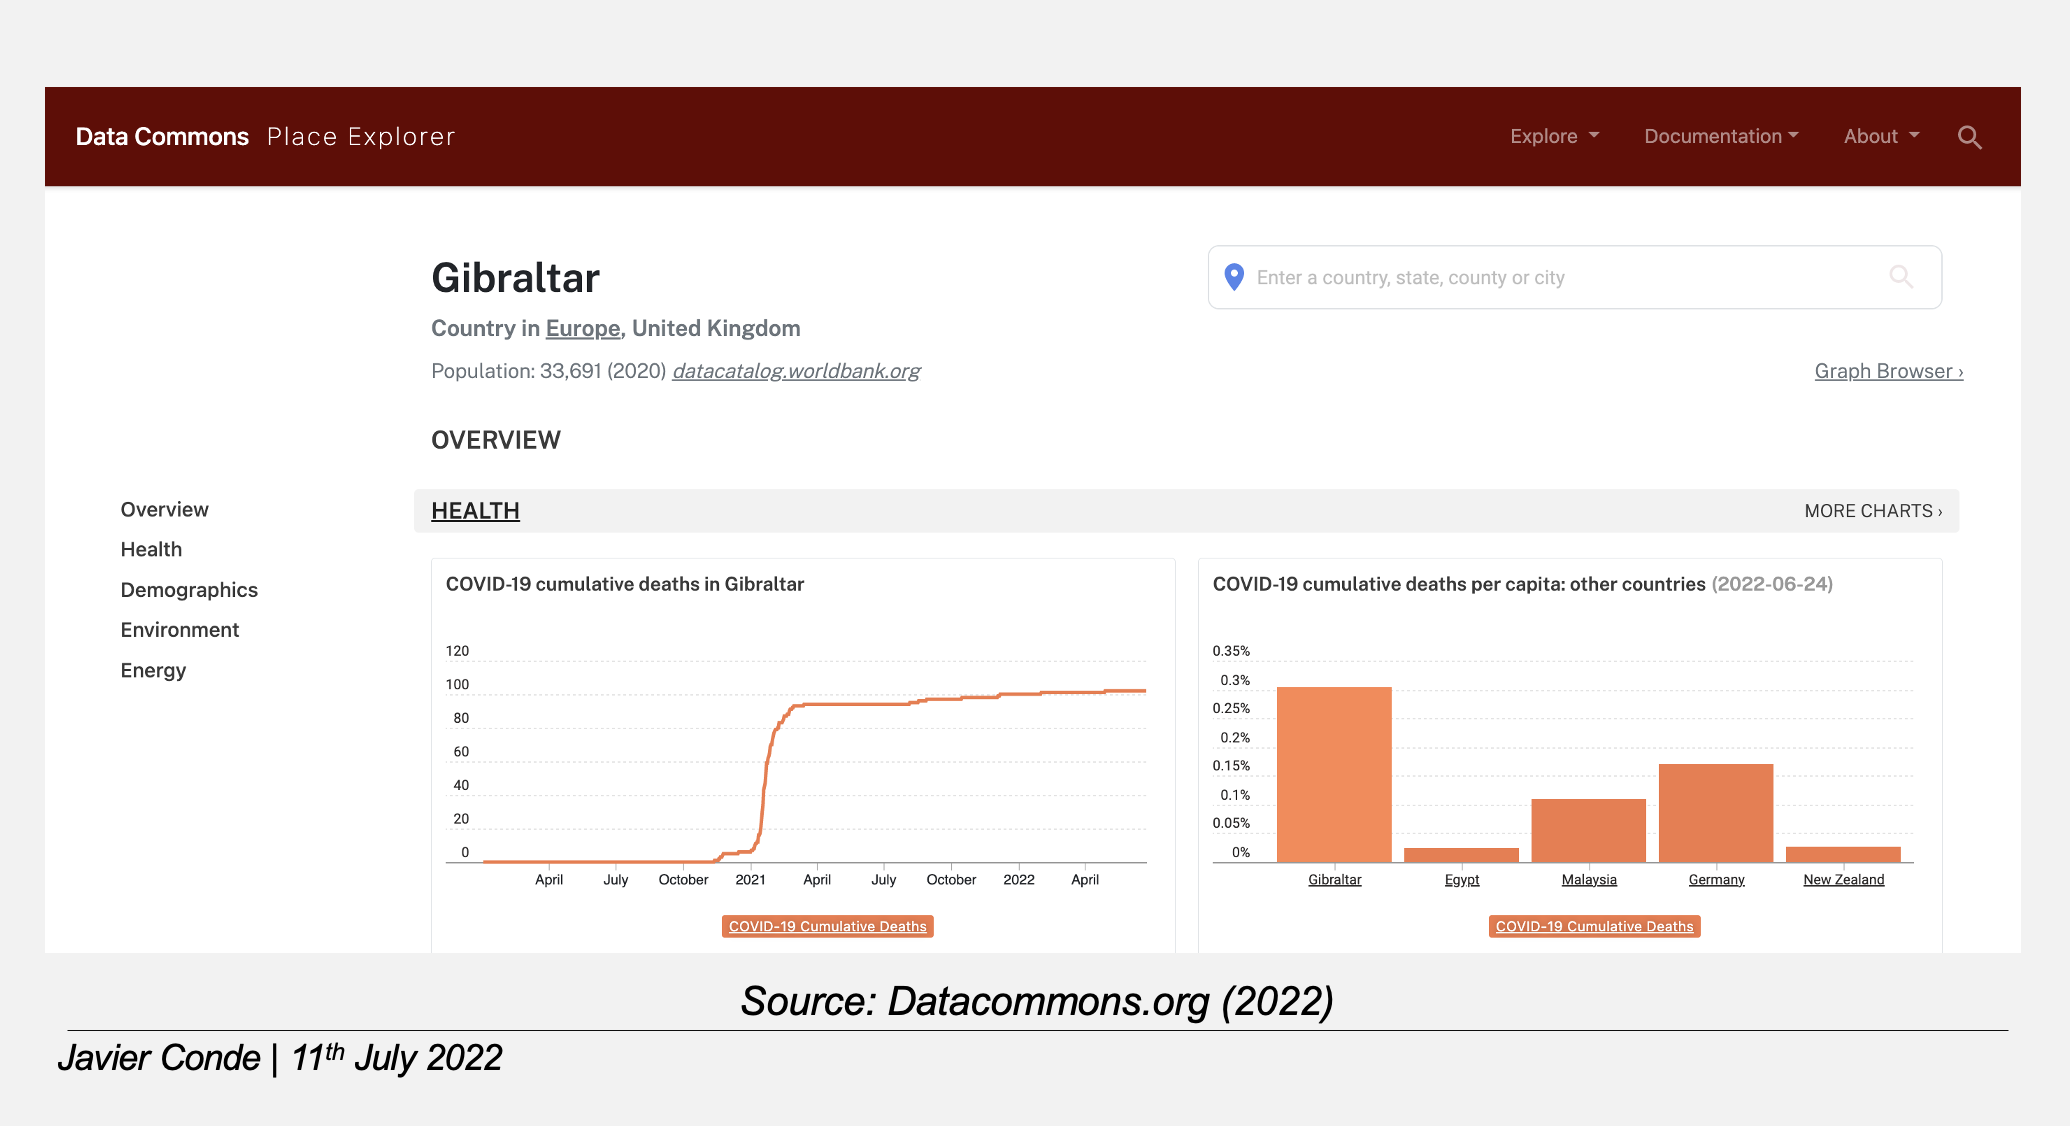

<AxesSubplot:xlabel='Province/State'>

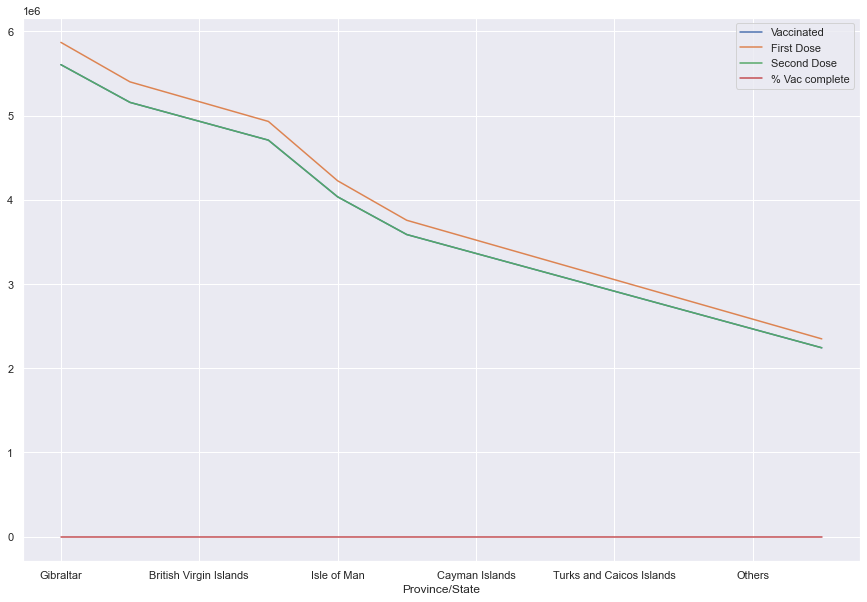

In [34]:
# Are there any visualisations that could be added here to make it easier?
# Let's try a simple visualisation with Pandas

vac_overview.plot()


In [298]:
# This is an example of a not very informative or well done plot. 
# Let's explore more detailed and better prepared visualisation over time on Matplotlib later.

### Note: Always important to keep an eye on data quality, understanding data shape & data types at all times and look for:
- Missing values
- Data types
- Inconsistency in column names
- Possible duplicate entries
- Inconsistent data entry & spelling
- Start looking for possible outliers with the .describe() method

# Part 3: Vaccination - areas to target marketing campaign and first approach to visualisations

In [35]:
# Let's join the DataFrames as covid where you merge cov and vac.

covid = pd.merge(vac, cov, how = 'inner')

In [36]:
# Let's explore the 'covid' DataFrame with 'shape', 'dtypes','columns', 'head', 'tail' arguments.

print(covid.shape)
print(covid.dtypes)
print(covid.columns)
covid.head()

(7584, 15)
Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object
Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Vaccinated', 'First Dose',
       'Second Dose', 'Deaths', 'Cases', 'Recovered', 'Hospitalised'],
      dtype='object')


Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Vaccinated  First Dose  Second Dose  Deaths  Cases  Recovered  Hospitalised  
0           0           0            0     0.0    0.0        0.0           0.0  
1           0           0            0     0.0    0.0        0.0           0.0  
2           0           0            0     0.0    0.0        0.0           0.0  
3           0           0            0     0.0    0.0        0.0           0.0  
4           0           0            0     0.0    0.0        0.0           0.0

In [38]:
# Now fix the date column data type.

covid['Date'] = covid['Date'].astype('datetime64')
print(covid.dtypes)

Province/State                      object
Country/Region                      object
Lat                                float64
Long                               float64
ISO 3166-1 Alpha 3-Codes            object
Sub-region Name                     object
Intermediate Region Code             int64
Date                        datetime64[ns]
Vaccinated                           int64
First Dose                           int64
Second Dose                          int64
Deaths                             float64
Cases                              float64
Recovered                          float64
Hospitalised                       float64
dtype: object


In [39]:
# After merging both DataFrames, let's drop unnecessary columns.

covid_lean = covid[['Province/State', 'Date', 'Vaccinated', 'First Dose',
                    'Second Dose', 'Deaths', 'Cases', 'Recovered', 'Hospitalised']]
covid_lean.tail()

Province/State       Date  Vaccinated  First Dose  Second Dose    Deaths  \
7579         Others 2021-10-10        1070        1216         1070  137735.0   
7580         Others 2021-10-11        1300        1604         1300  137763.0   
7581         Others 2021-10-12        1482        2027         1482  137944.0   
7582         Others 2021-10-13           0           0            0  138080.0   
7583         Others 2021-10-14           0           0            0  138237.0   

          Cases  Recovered  Hospitalised  
7579  8154306.0        0.0         378.0  
7580  8193769.0        0.0         386.0  
7581  8231437.0        0.0         386.0  
7582  8272883.0        0.0           0.0  
7583  8317439.0        0.0           0.0

In [40]:
# We use 'groupby' and calculate total difference between first and second dose, by 'Province/State'.

covid_lean['Missing Second Dose'] = covid_lean['First Dose'] - covid_lean['Second Dose']

/var/folders/_k/8h4zfdrd3qgd4kzz6qhbbzyh0000gn/T/ipykernel_85250/2606249535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_lean['Missing Second Dose'] = covid_lean['First Dose'] - covid_lean['Second Dose']


In [42]:
covid_lean.head()

Province/State       Date  Vaccinated  First Dose  Second Dose  Deaths  \
0       Anguilla 2020-01-22           0           0            0     0.0   
1       Anguilla 2020-01-23           0           0            0     0.0   
2       Anguilla 2020-01-24           0           0            0     0.0   
3       Anguilla 2020-01-25           0           0            0     0.0   
4       Anguilla 2020-01-26           0           0            0     0.0   

   Cases  Recovered  Hospitalised  Missing Second Dose  
0    0.0        0.0           0.0                    0  
1    0.0        0.0           0.0                    0  
2    0.0        0.0           0.0                    0  
3    0.0        0.0           0.0                    0  
4    0.0        0.0           0.0                    0

In [44]:
covid_lean_province_sum = covid_lean.groupby('Province/State')[['First Dose', 'Second Dose',\
                                                                'Missing Second Dose',]]\
.sum().sort_values('Missing Second Dose', ascending=False)

covid_lean_province_sum

First Dose  Second Dose  \
Province/State                                                          
Gibraltar                                        5870786      5606041   
Montserrat                                       5401128      5157560   
British Virgin Islands                           5166303      4933315   
Anguilla                                         4931470      4709072   
Isle of Man                                      4226984      4036345   
Falkland Islands (Malvinas)                      3757307      3587869   
Cayman Islands                                   3522476      3363624   
Channel Islands                                  3287646      3139385   
Turks and Caicos Islands                         3052822      2915136   
Bermuda                                          2817981      2690908   
Others                                           2583151      2466669   
Saint Helena, Ascension and Tristan da Cunha     2348310      2242421   

                                              Missing Second Dose  
Province/State                                                     
Gibraltar                                                  264745  
Montserrat                                                 243568  
British Virgin Islands                                     232988  
Anguilla                                                   222398  
Isle of Man                                                190639  
Falkland Islands (Malvinas)                                169438  
Cayman Islands                                             158852  
Channel Islands                                            148261  
Turks and Caicos Islands                                   137686  
Bermuda                                                    127073  
Others                                                     116482  
Saint Helena, Ascension and Tristan da Cunha               105889

In [45]:
# Let's add now the column'% Missing Second Dose' with these same numbers in percentages.

In [46]:
covid_lean_province_sum['% Missing Second Dose'] = (covid_lean_province_sum['Missing Second Dose']\
                                                /covid_lean_province_sum['First Dose'])* 100
covid_lean_province_sum

First Dose  Second Dose  \
Province/State                                                          
Gibraltar                                        5870786      5606041   
Montserrat                                       5401128      5157560   
British Virgin Islands                           5166303      4933315   
Anguilla                                         4931470      4709072   
Isle of Man                                      4226984      4036345   
Falkland Islands (Malvinas)                      3757307      3587869   
Cayman Islands                                   3522476      3363624   
Channel Islands                                  3287646      3139385   
Turks and Caicos Islands                         3052822      2915136   
Bermuda                                          2817981      2690908   
Others                                           2583151      2466669   
Saint Helena, Ascension and Tristan da Cunha     2348310      2242421   

                                              Missing Second Dose  \
Province/State                                                      
Gibraltar                                                  264745   
Montserrat                                                 243568   
British Virgin Islands                                     232988   
Anguilla                                                   222398   
Isle of Man                                                190639   
Falkland Islands (Malvinas)                                169438   
Cayman Islands                                             158852   
Channel Islands                                            148261   
Turks and Caicos Islands                                   137686   
Bermuda                                                    127073   
Others                                                     116482   
Saint Helena, Ascension and Tristan da Cunha               105889   

                                              % Missing Second Dose  
Province/State                                                       
Gibraltar                                                  4.509532  
Montserrat                                                 4.509577  
British Virgin Islands                                     4.509763  
Anguilla                                                   4.509771  
Isle of Man                                                4.510048  
Falkland Islands (Malvinas)                                4.509560  
Cayman Islands                                             4.509669  
Channel Islands                                            4.509640  
Turks and Caicos Islands                                   4.510122  
Bermuda                                                    4.509363  
Others                                                     4.509299  
Saint Helena, Ascension and Tristan da Cunha               4.509158

## This DataFrame answers both questions: "Which Province/State has the highest number/percentage of individuals who have received a first dose but not a second dose?" Gibraltar, with 264,745 individuals (4.5%) missing their second doses.

In [48]:
# Let's try now two different approaches: visualisation and finding out max/min.
# APPROACH 1: VISUALISATION.

In [49]:
# Let's split the date column into year-month-day to filter it better.

covid_lean['Month'] = covid_lean['Date'].dt.month
covid_lean['Year'] = covid_lean['Date'].dt.year

/var/folders/_k/8h4zfdrd3qgd4kzz6qhbbzyh0000gn/T/ipykernel_85250/1046729665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_lean['Month'] = covid_lean['Date'].dt.month
/var/folders/_k/8h4zfdrd3qgd4kzz6qhbbzyh0000gn/T/ipykernel_85250/1046729665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_lean['Year'] = covid_lean['Date'].dt.year


In [51]:
covid_lean.head()

Province/State       Date  Vaccinated  First Dose  Second Dose  Deaths  \
0       Anguilla 2020-01-22           0           0            0     0.0   
1       Anguilla 2020-01-23           0           0            0     0.0   
2       Anguilla 2020-01-24           0           0            0     0.0   
3       Anguilla 2020-01-25           0           0            0     0.0   
4       Anguilla 2020-01-26           0           0            0     0.0   

   Cases  Recovered  Hospitalised  Missing Second Dose  Month  Year  
0    0.0        0.0           0.0                    0      1  2020  
1    0.0        0.0           0.0                    0      1  2020  
2    0.0        0.0           0.0                    0      1  2020  
3    0.0        0.0           0.0                    0      1  2020  
4    0.0        0.0           0.0                    0      1  2020

In [52]:
covid_lean_2021=covid_lean.query('Date >=20210101')
covid_lean_2021.head()

Province/State       Date  Vaccinated  First Dose  Second Dose  Deaths  \
345       Anguilla 2021-01-01           0           0            0     0.0   
346       Anguilla 2021-01-02           0           0            0     0.0   
347       Anguilla 2021-01-03           0           0            0     0.0   
348       Anguilla 2021-01-04           0           0            0     0.0   
349       Anguilla 2021-01-05           0           0            0     0.0   

     Cases  Recovered  Hospitalised  Missing Second Dose  Month  Year  
345   13.0       12.0        2771.0                    0      1  2021  
346   13.0       12.0        2894.0                    0      1  2021  
347   15.0       13.0        3048.0                    0      1  2021  
348   15.0       13.0        3231.0                    0      1  2021  
349   15.0       13.0        3222.0                    0      1  2021

In [299]:
covid_lean_2021_month = covid_lean_2021.groupby(['Month', 'Province/State'])[['First Dose', 'Second Dose',\
                                                                'Missing Second Dose',]]\
.sum().sort_values('Month', ascending=True)

covid_lean_2021_month.tail()

First Dose  Second Dose  \
Month Province/State                                                          
10    Bermuda                                            23367        20275   
      Anguilla                                           40891        35480   
      Saint Helena, Ascension and Tristan da Cunha       19471        16898   
      Channel Islands                                    27262        23654   
      Turks and Caicos Islands                           25316        21964   

                                                    Missing Second Dose  
Month Province/State                                                     
10    Bermuda                                                      3092  
      Anguilla                                                     5411  
      Saint Helena, Ascension and Tristan da Cunha                 2573  
      Channel Islands                                              3608  
      Turks and Caicos Islands                                     3352

In [66]:
# Let's add a filter to understand evolution for Gibraltar.

covid_lean_2021_gibraltar = covid_lean_2021[covid_lean_2021['Province/State'] == 'Gibraltar']

covid_lean_2021_gibraltar_month = covid_lean_2021_gibraltar.groupby(['Month'])[['First Dose', 'Second Dose',\
                                                                'Missing Second Dose',]]\
.sum().sort_values('Month', ascending=True)

covid_lean_2021_gibraltar_month

First Dose  Second Dose  Missing Second Dose
Month                                              
1          876224        12851               863373
2         1372385        40201              1332184
3         1358999       462203               896796
4          401847      1305483              -903636
5          639366      1347172              -707806
6          672977       914184              -241207
7          244424       659247              -414823
8          158939       573475              -414536
9           96945       248983              -152038
10          48680        42242                 6438

<AxesSubplot:xlabel='Month', ylabel='First Dose'>

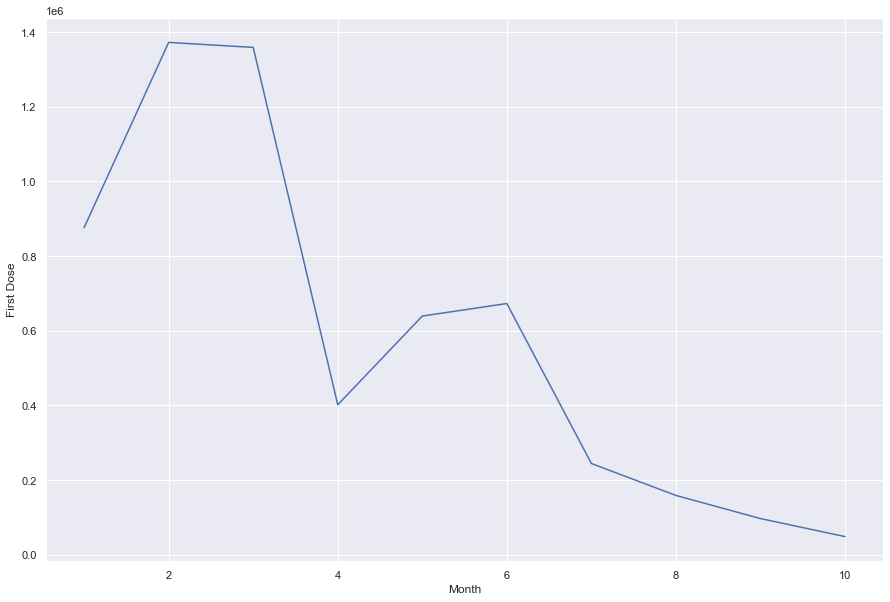

In [67]:
sns.lineplot(x='Month', y='First Dose', data=covid_lean_2021_gibraltar_month, ci=None)

In [53]:
# Let's plot now the evolution of First Doses for every province.

import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Month', ylabel='First Dose'>

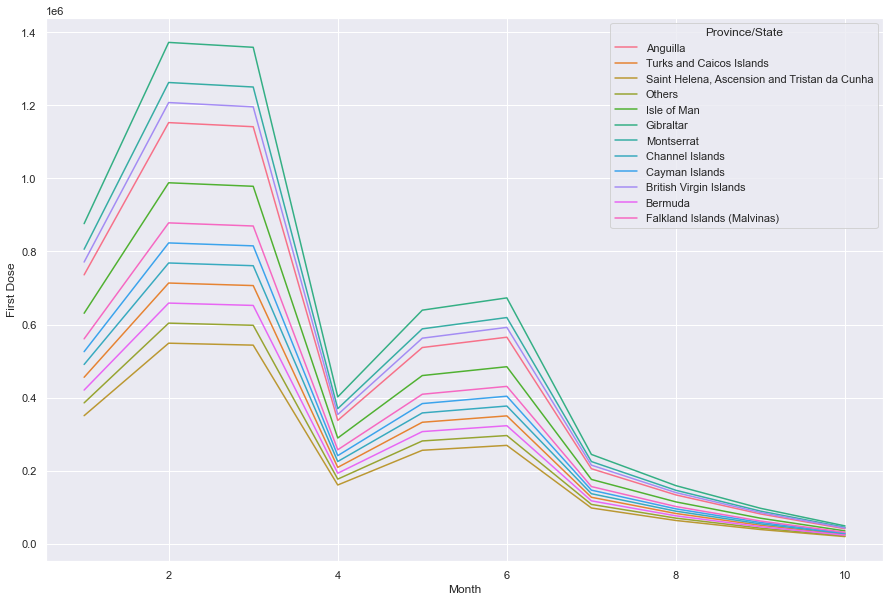

In [61]:
sns.lineplot(x='Month', y='First Dose', hue='Province/State', data=covid_lean_2021_month, ci=None)

<AxesSubplot:xlabel='Month', ylabel='Second Dose'>

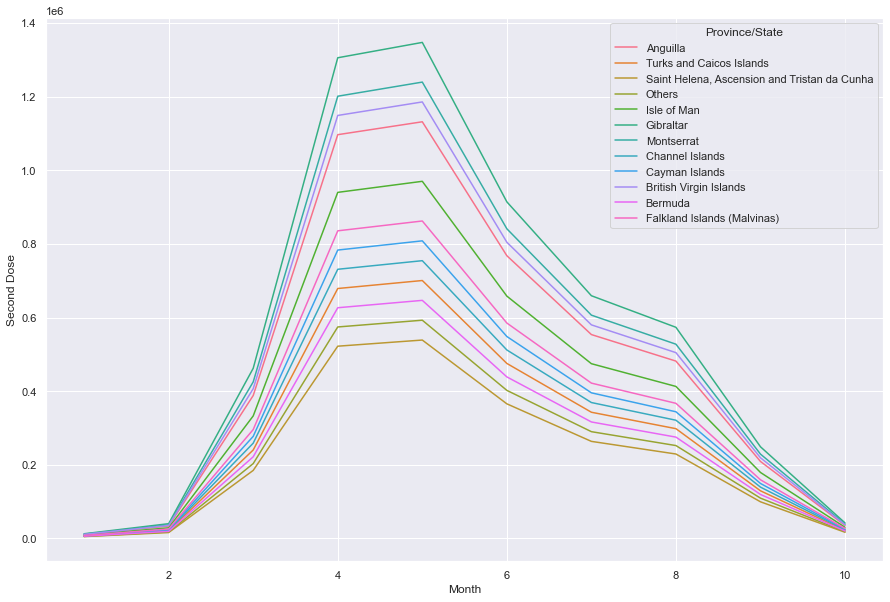

In [62]:
# Now the evolution of Second Doses/Complete Vac Cycle for every province.


sns.lineplot(x='Month', y='Second Dose', hue='Province/State', data=covid_lean_2021_month, ci=None)

In [69]:
# APPROACH 1: MAX/MIN.

# Groupby and calculate the difference between first and second dose over time.
# 1. Total global breakdown.

covid_lean_total_sum = covid_lean.groupby(['Year', 'Month'])[['First Dose','Second Dose','Missing Second \
Dose']].sum().sort_values(['Year','Month'],ascending = [True, True])

covid_lean_total_sum['% Missing Second Dose'] = (covid_lean_total_sum['Missing Second Dose']\
                                                / covid_lean_total_sum['First Dose'])* 100
covid_lean_total_sum.tail()


First Dose  Second Dose  Missing Second Dose  \
Year Month                                                 
2021 6         5383815      7313473             -1929658   
     7         1955401      5273975             -3318574   
     8         1271518      4587807             -3316289   
     9          775585      1991847             -1216262   
     10         389450       337925                51525   

            % Missing Second Dose  
Year Month                         
2021 6                 -35.841833  
     7                -169.713220  
     8                -260.813374  
     9                -156.818659  
     10                 13.230196

In [70]:
# 2. By region breakdown.
covid_lean_region_sum = covid_lean.groupby(['Year', 'Month', 'Province/State'])\
[['First Dose', 'Second Dose', 'Missing Second Dose',]].sum().sort_values(['Year', 'Month'], ascending = [True, True])

covid_lean_region_sum['% Missing Second Dose'] = (covid_lean_region_sum['Missing Second Dose']\
                                                / covid_lean_region_sum['First Dose'])* 100
covid_lean_region_sum.tail()

First Dose  \
Year Month Province/State                                             
2021 10    Isle of Man                                        35051   
           Montserrat                                         44786   
           Others                                             21422   
           Saint Helena, Ascension and Tristan da Cunha       19471   
           Turks and Caicos Islands                           25316   

                                                         Second Dose  \
Year Month Province/State                                              
2021 10    Isle of Man                                         30413   
           Montserrat                                          38862   
           Others                                              18587   
           Saint Helena, Ascension and Tristan da Cunha        16898   
           Turks and Caicos Islands                            21964   

                                                         Missing Second Dose  \
Year Month Province/State                                                      
2021 10    Isle of Man                                                  4638   
           Montserrat                                                   5924   
           Others                                                       2835   
           Saint Helena, Ascension and Tristan da Cunha                 2573   
           Turks and Caicos Islands                                     3352   

                                                         % Missing Second Dose  
Year Month Province/State                                                       
2021 10    Isle of Man                                               13.232147  
           Montserrat                                                13.227348  
           Others                                                    13.234058  
           Saint Helena, Ascension and Tristan da Cunha              13.214524  
           Turks and Caicos Islands                                  13.240638

In [71]:
# To locate max and min moments of vaccination.

covid_lean_region_sum.loc[covid_lean_region_sum['First Dose'] == covid_lean_region_sum['First Dose'].max()]

First Dose  Second Dose  Missing Second Dose  \
Year Month Province/State                                                 
2021 2     Gibraltar          1372385        40201              1332184   

                           % Missing Second Dose  
Year Month Province/State                         
2021 2     Gibraltar                    97.07072

In [72]:
covid_lean_region_sum.loc[covid_lean_region_sum['Second Dose'] == covid_lean_region_sum['Second Dose'].max()]

First Dose  Second Dose  Missing Second Dose  \
Year Month Province/State                                                 
2021 5     Gibraltar           639366      1347172              -707806   

                           % Missing Second Dose  
Year Month Province/State                         
2021 5     Gibraltar                 -110.704354

In [73]:
covid_lean_region_sum.loc[covid_lean_region_sum['Missing Second Dose'] \
                          == covid_lean_region_sum['Missing Second Dose'].min()]

First Dose  Second Dose  Missing Second Dose  \
Year Month Province/State                                                 
2021 4     Gibraltar           401847      1305483              -903636   

                           % Missing Second Dose  
Year Month Province/State                         
2021 4     Gibraltar                  -224.87066

### First findings on the evolution over time
- Jan 2021 is when we find the first records on vaccination
- Gibraltar (876,224), Monserrat (806,126) and British Virgin Islands (771,077) provinces had best start on vaccination campaign
- Gibraltar quickest to reach max 1st vacc dose (Feb 2021) and 2nd vacc dose (May 2021)

### 3.2) Presentation expectations:
We use similar calculations and representations as we had in assignment activity 2, but now expand to look at all provinces. Assignment activity 3 is concerned with exploring data in the context of a specific business question (as opposed to general exploration in assignment activity 2).
- What insights can be gained from the data? (Description of all regions, assumptions and concerns, trends or patterns you have observed.)
- Are there limitations or assumptions that needs to be considered?
- Make sure to provide a brief overview of the data and typical considerations at this phase of analysis.

# Part 4: Visualisations exploration

### Objective 1: Vaccination status x province

In [74]:
# Data is grouped already from previous parts.
# The ratio of people who have received the second dose over the first dose can be easily looked up in 
# the new column that holds the % 'Missing Second Dose' value (e.g. First Percentage).

covid_lean_province_sum.tail()

First Dose  Second Dose  \
Province/State                                                          
Channel Islands                                  3287646      3139385   
Turks and Caicos Islands                         3052822      2915136   
Bermuda                                          2817981      2690908   
Others                                           2583151      2466669   
Saint Helena, Ascension and Tristan da Cunha     2348310      2242421   

                                              Missing Second Dose  \
Province/State                                                      
Channel Islands                                            148261   
Turks and Caicos Islands                                   137686   
Bermuda                                                    127073   
Others                                                     116482   
Saint Helena, Ascension and Tristan da Cunha               105889   

                                              % Missing Second Dose  
Province/State                                                       
Channel Islands                                            4.509640  
Turks and Caicos Islands                                   4.510122  
Bermuda                                                    4.509363  
Others                                                     4.509299  
Saint Helena, Ascension and Tristan da Cunha               4.509158

In [75]:
# Let's create a vertical grouped bar plot per region on fully vaccinated vs only 1st dose in seaborn.
# Seaborn can not interpret index so let's make 'Province/State' a column.

covid_lean_province_sum['Province/State'] = covid_lean_province_sum.index
covid_lean_province_sum.tail()

First Dose  Second Dose  \
Province/State                                                          
Channel Islands                                  3287646      3139385   
Turks and Caicos Islands                         3052822      2915136   
Bermuda                                          2817981      2690908   
Others                                           2583151      2466669   
Saint Helena, Ascension and Tristan da Cunha     2348310      2242421   

                                              Missing Second Dose  \
Province/State                                                      
Channel Islands                                            148261   
Turks and Caicos Islands                                   137686   
Bermuda                                                    127073   
Others                                                     116482   
Saint Helena, Ascension and Tristan da Cunha               105889   

                                              % Missing Second Dose  \
Province/State                                                        
Channel Islands                                            4.509640   
Turks and Caicos Islands                                   4.510122   
Bermuda                                                    4.509363   
Others                                                     4.509299   
Saint Helena, Ascension and Tristan da Cunha               4.509158   

                                                                            Province/State  
Province/State                                                                              
Channel Islands                                                            Channel Islands  
Turks and Caicos Islands                                          Turks and Caicos Islands  
Bermuda                                                                            Bermuda  
Others                                                                              Others  
Saint Helena, Ascension and Tristan da Cunha  Saint Helena, Ascension and Tristan da Cunha

In [77]:
# Let's make easy to represent it graphically modifying the format of this table.
# Export in XLS, rework the format and import it again as a DataFrame.

covid_lean_province_sum.to_excel(r'covid_lean_province_sum.xlsx', index = False)
covid_lean_province_sum_barplot = pd.read_excel('covid_lean_province_sum_barplot.xlsx')

print(covid_lean_province_sum_barplot.shape)
covid_lean_province_sum_barplot

(24, 3)


Count  Dose Status                                Province/State
0   5870786   First Dose                                     Gibraltar
1   5401128   First Dose                                    Montserrat
2   5166303   First Dose                        British Virgin Islands
3   4931470   First Dose                                      Anguilla
4   4226984   First Dose                                   Isle of Man
5   3757307   First Dose                   Falkland Islands (Malvinas)
6   3522476   First Dose                                Cayman Islands
7   3287646   First Dose                               Channel Islands
8   3052822   First Dose                      Turks and Caicos Islands
9   2817981   First Dose                                       Bermuda
10  2583151   First Dose                                        Others
11  2348310   First Dose  Saint Helena, Ascension and Tristan da Cunha
12  5606041  Second Dose                                     Gibraltar
13  5157560  Second Dose                                    Montserrat
14  4933315  Second Dose                        British Virgin Islands
15  4709072  Second Dose                                      Anguilla
16  4036345  Second Dose                                   Isle of Man
17  3587869  Second Dose                   Falkland Islands (Malvinas)
18  3363624  Second Dose                                Cayman Islands
19  3139385  Second Dose                               Channel Islands
20  2915136  Second Dose                      Turks and Caicos Islands
21  2690908  Second Dose                                       Bermuda
22  2466669  Second Dose                                        Others
23  2242421  Second Dose  Saint Helena, Ascension and Tristan da Cunha

Text(0.5, 1.0, 'Vaccination status x province')

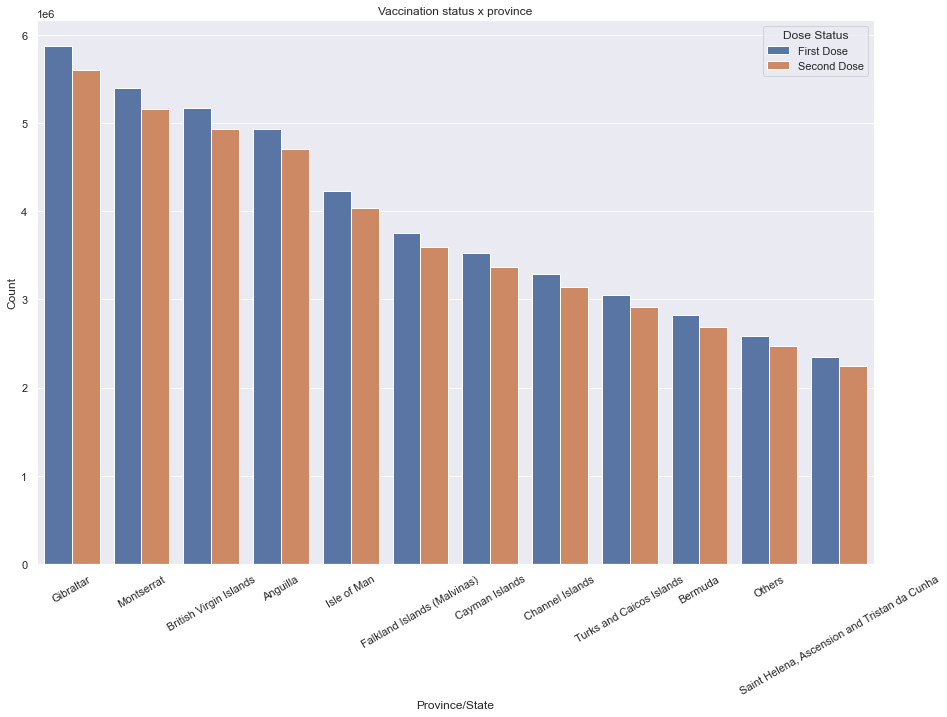

In [302]:
# Plotting formatted DataFrame.

covidplot1 = sns.barplot(x='Province/State', y='Count', hue='Dose Status', data=covid_lean_province_sum_barplot)
plt.xticks(rotation=30)
plt.title('Vaccination status x province')

In [303]:
# Saving the plot and exporting it as PNG.

covidplot1.figure.savefig('covidplot1.png', bbox_inches='tight')

### Objective 2: Evolution of reported deaths due to COVID x province

In [128]:
# Group the data by Province/State and Date, and aggregate the death count.

covid_lean_deaths_time_sum = covid_lean.groupby(['Province/State', 'Date'])['Deaths'].agg(['sum'])
covid_lean_deaths_time_sum.tail()

sum
Province/State           Date            
Turks and Caicos Islands 2021-10-10  23.0
                         2021-10-11  23.0
                         2021-10-12  23.0
                         2021-10-13  23.0
                         2021-10-14  23.0

<AxesSubplot:xlabel='Date', ylabel='sum'>

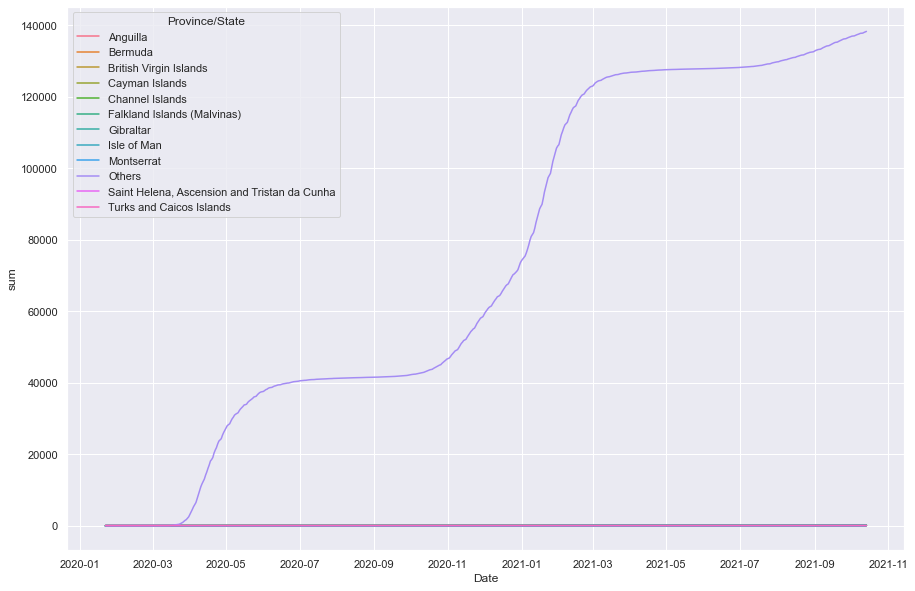

In [114]:
sns.lineplot(x='Date', y='sum', hue='Province/State', data=covid_lean_deaths_time_sum, ci=None)

In [115]:
# These results are sweked because of the column "Others". Let's calculate again skipping it.

covid_lean_deaths_sum = covid_lean.groupby(['Province/State'])['Deaths'].sum()

covid_lean_deaths_sum

Province/State
Anguilla                                              24.0
Bermuda                                            10353.0
British Virgin Islands                              3573.0
Cayman Islands                                       911.0
Channel Islands                                    37130.0
Falkland Islands (Malvinas)                            0.0
Gibraltar                                          25412.0
Isle of Man                                        15051.0
Montserrat                                           539.0
Others                                          46987145.0
Saint Helena, Ascension and Tristan da Cunha           4.0
Turks and Caicos Islands                            5612.0
Name: Deaths, dtype: float64

In [144]:
# Filter out column with 'isin'+ opossite '~'
covid_filtered = covid_lean_deaths_time_sum[~covid_lean_deaths_time_sum.index.isin(['Others'], level='Province/State')]

covid_filtered.tail()


sum
Province/State           Date            
Turks and Caicos Islands 2021-10-10  23.0
                         2021-10-11  23.0
                         2021-10-12  23.0
                         2021-10-13  23.0
                         2021-10-14  23.0

Text(0.5, 1.0, 'Evolution of reported deaths due to COVID x province x date')

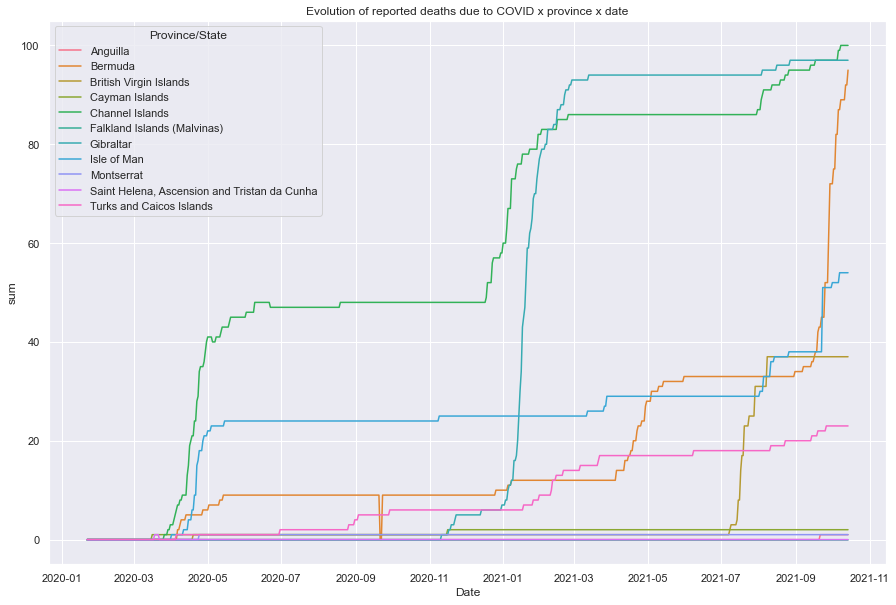

In [307]:
covidplot2 = sns.lineplot(x='Date', y='sum', hue='Province/State', data=covid_filtered, ci=None)
plt.title('Evolution of reported deaths due to COVID x province x date')

In [308]:
covidplot2.figure.savefig('covidplot2.png', bbox_inches='tight')

In [149]:
covid_lean.head()

Province/State       Date  Vaccinated  First Dose  Second Dose  Deaths  \
0       Anguilla 2020-01-22           0           0            0     0.0   
1       Anguilla 2020-01-23           0           0            0     0.0   
2       Anguilla 2020-01-24           0           0            0     0.0   
3       Anguilla 2020-01-25           0           0            0     0.0   
4       Anguilla 2020-01-26           0           0            0     0.0   

   Cases  Recovered  Hospitalised  Missing Second Dose  Month  Year  
0    0.0        0.0           0.0                    0      1  2020  
1    0.0        0.0           0.0                    0      1  2020  
2    0.0        0.0           0.0                    0      1  2020  
3    0.0        0.0           0.0                    0      1  2020  
4    0.0        0.0           0.0                    0      1  2020

In [154]:
# Convert Date into Months and plot the same line graph as previously.

covid_lean['Month'] = pd.to_datetime(covid_lean['Date']+pd.offsets.MonthBegin(-1))
covid_lean.head()

/var/folders/_k/8h4zfdrd3qgd4kzz6qhbbzyh0000gn/T/ipykernel_85250/1258106369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_lean['Month'] = pd.to_datetime(covid_lean['Date']+pd.offsets.MonthBegin(-1))


Province/State       Date  Vaccinated  First Dose  Second Dose  Deaths  \
0       Anguilla 2020-01-22           0           0            0     0.0   
1       Anguilla 2020-01-23           0           0            0     0.0   
2       Anguilla 2020-01-24           0           0            0     0.0   
3       Anguilla 2020-01-25           0           0            0     0.0   
4       Anguilla 2020-01-26           0           0            0     0.0   

   Cases  Recovered  Hospitalised  Missing Second Dose      Month  Year  
0    0.0        0.0           0.0                    0 2020-01-01  2020  
1    0.0        0.0           0.0                    0 2020-01-01  2020  
2    0.0        0.0           0.0                    0 2020-01-01  2020  
3    0.0        0.0           0.0                    0 2020-01-01  2020  
4    0.0        0.0           0.0                    0 2020-01-01  2020

Text(0.5, 1.0, 'Evolution of reported deaths due to COVID x province x month')

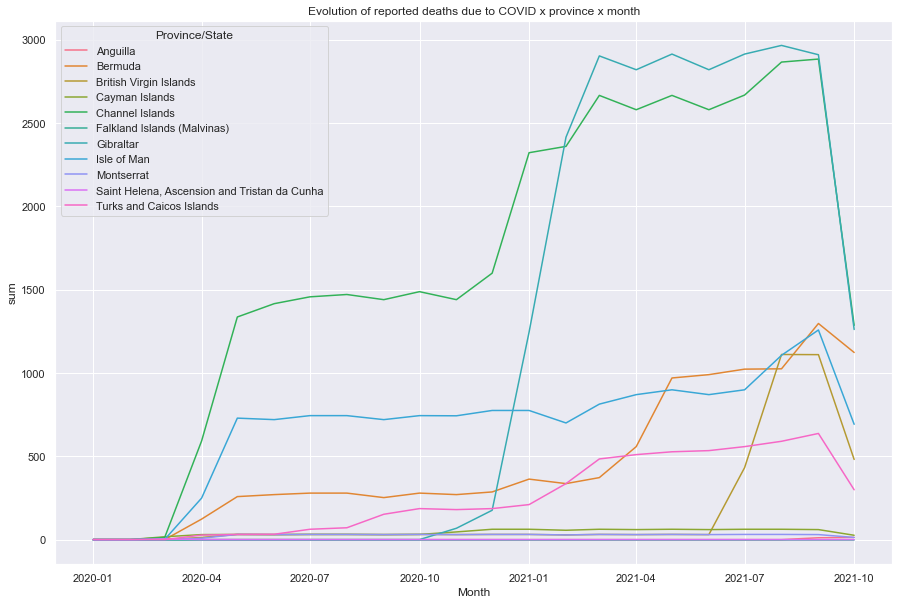

In [315]:
# Repeat the whole process with 'Month' column instead of 'Date' column

covid_lean_deaths_time2_sum = covid_lean.groupby(['Province/State', 'Month'])['Deaths'].agg(['sum'])
covid_lean_deaths_time2_sum.tail()

covid_filtered2 = covid_lean_deaths_time2_sum[~covid_lean_deaths_time2_sum.index.isin(['Others'], \
                                                                                      level='Province/State')]
covid_filtered2.tail()

covidplot3 = sns.lineplot(x='Month', y='sum', hue='Province/State', data=covid_filtered2, ci=None)
plt.title('Evolution of reported deaths due to COVID x province x month')

In [310]:
# Saving the plot and exporting it as PNG

covidplot3.figure.savefig('covidplot3.png', bbox_inches='tight')

### Objective 3: Evolution of recovered from COVID x province x month

In [311]:
# Group the data by Province/State, aggregate the count of recovered cases. 
# Sort the values of recovered cases in ascending order.

covid_lean_recov_sum = covid_lean.groupby(['Province/State', 'Month'])['Recovered'].agg(['sum']).sort_values(['sum'], \
                                                                                                    ascending=True)
covid_lean_recov_sum


sum
Province/State                               Month               
Anguilla                                     2020-01-01       0.0
Montserrat                                   2021-09-01       0.0
                                             2020-03-01       0.0
                                             2020-02-01       0.0
                                             2020-01-01       0.0
Isle of Man                                  2021-10-01       0.0
                                             2021-09-01       0.0
                                             2020-03-01       0.0
                                             2020-02-01       0.0
                                             2020-01-01       0.0
Gibraltar                                    2021-10-01       0.0
                                             2021-09-01       0.0
                                             2020-02-01       0.0
                                             2020-01-01       0.0
Montserrat                                   2021-10-01       0.0
Turks and Caicos Islands                     2021-09-01       0.0
Falkland Islands (Malvinas)                  2020-03-01       0.0
                                             2020-02-01       0.0
                                             2020-01-01       0.0
Channel Islands                              2021-10-01       0.0
                                             2021-09-01       0.0
                                             2020-03-01       0.0
                                             2020-02-01       0.0
                                             2020-01-01       0.0
Cayman Islands                               2021-10-01       0.0
                                             2021-09-01       0.0
                                             2020-03-01       0.0
                                             2020-02-01       0.0
                                             2020-01-01       0.0
Falkland Islands (Malvinas)                  2021-09-01       0.0
British Virgin Islands                       2021-10-01       0.0
Others                                       2020-01-01       0.0
                                             2020-06-01       0.0
Turks and Caicos Islands                     2020-03-01       0.0
                                             2020-02-01       0.0
                                             2020-01-01       0.0
Saint Helena, Ascension and Tristan da Cunha 2021-10-01       0.0
                                             2021-09-01       0.0
                                             2020-08-01       0.0
                                             2020-07-01       0.0
                                             2020-06-01       0.0
                                             2020-05-01       0.0
                                             2020-04-01       0.0
                                             2020-02-01       0.0
                                             2020-01-01       0.0
Others                                       2021-10-01       0.0
                                             2020-05-01       0.0
                                             2021-09-01       0.0
                                             2021-07-01       0.0
                                             2021-06-01       0.0
                                             2021-05-01       0.0
                                             2021-04-01       0.0
                                             2021-03-01       0.0
                                             2021-02-01       0.0
                                             2021-01-01       0.0
                                             2020-12-01       0.0
                                             2020-11-01       0.0
                                             2020-10-01       0.0
                                             2020-09-01       0.0
                                    

Text(0.5, 1.0, 'Evolution of recovered from COVID x province x month')

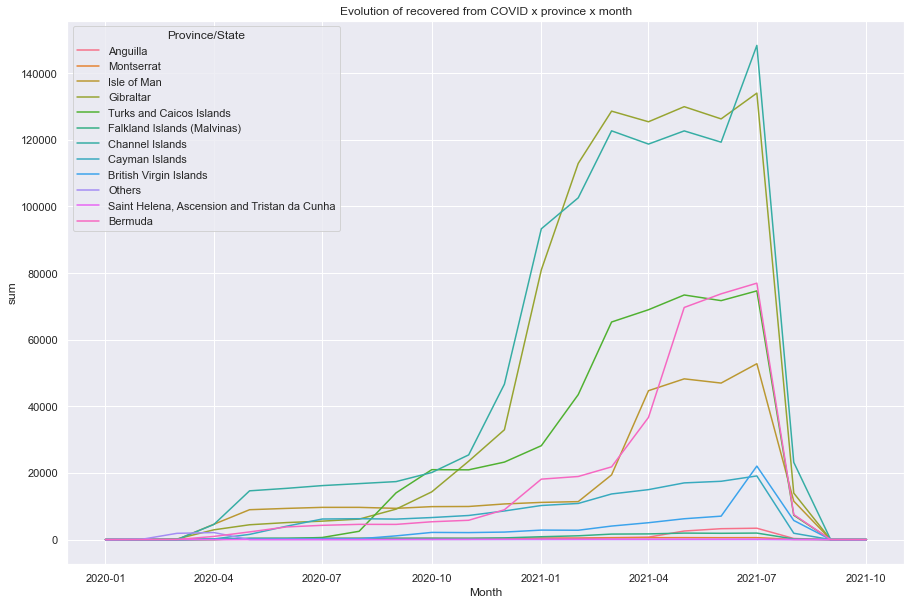

In [314]:
covidplot4 = sns.lineplot(x='Month', y='sum', hue='Province/State', data=covid_lean_recov_sum, ci=None)
plt.title('Evolution of recovered from COVID x province x month')

In [316]:
# Saving the plot and exporting it as PNG.

covidplot4.figure.savefig('covidplot4.png', bbox_inches='tight')

### Objective 4: Evolution of hospitalisations from COVID x province x month

In [397]:
# Group the data by Province/State, aggregate the count of recovered cases. 
# Sort the values of recovered cases in ascending order.

covid_lean_hosp_sum = covid_lean.groupby(['Province/State', 'Month'])['Hospitalised'].agg(['sum']).sort_values(['sum'], \
                                                                                                    ascending=True)
covid_lean_hosp_sum.tail()


sum
Province/State         Month               
Isle of Man            2021-01-01   98520.0
Anguilla               2021-01-01  114943.0
British Virgin Islands 2021-01-01  120416.0
Montserrat             2021-01-01  125888.0
Gibraltar              2021-01-01  136835.0

Text(0.5, 1.0, 'Evolution of hospitalisations from COVID x province x month')

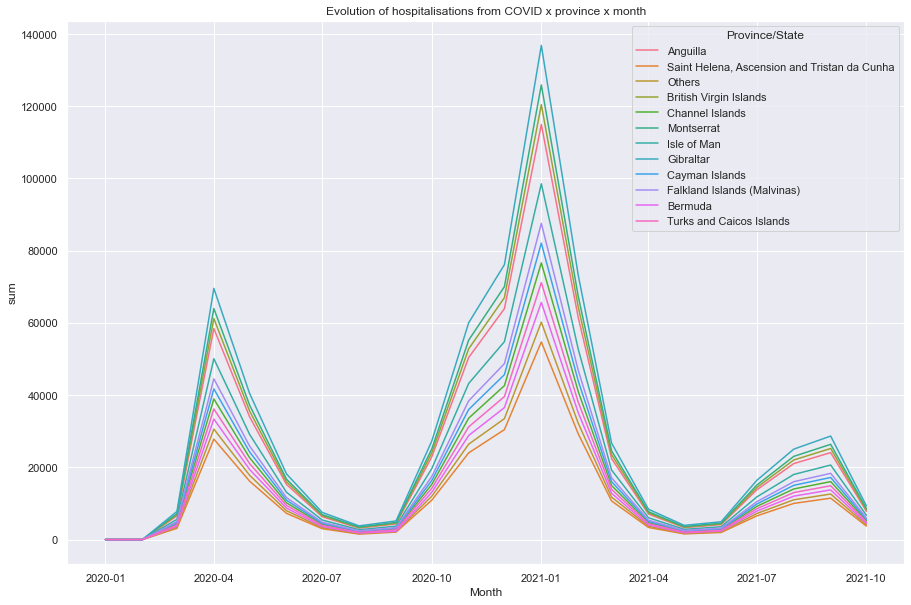

In [404]:
covidplot5 = sns.lineplot(x='Month', y='sum', hue='Province/State', data=covid_lean_hosp_sum, ci=None)
plt.title('Evolution of hospitalisations from COVID x province x month')

In [405]:
covidplot5.figure.savefig('covidplot5.png', bbox_inches='tight')

# Part 5: Twitter data relating to the #coronavirus hashtag exploration

In [177]:
# Let's import the required libraries and set the plotting options.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200

sns.set(rc = {'figure.figsize':(15,10)})

In [180]:
# The tweet data set.

tweets = pd.read_csv('tweets.csv')
print(tweets.shape)
print(tweets.dtypes)
print(tweets.columns)
tweets.info()

(3960, 21)
created_at                    object
id                           float64
id_str                       float64
text                          object
truncated                     object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name      float64
contributors                 float64
is_quote_status               object
retweet_count                  int64
favorite_count                 int64
favorited                     object
retweeted                     object
lang                          object
possibly_sensitive            object
quoted_status_id             float64
quoted_status_id_str         float64
dtype: object
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_r

In [175]:
tweets.head()

created_at            id        id_str  \
0  23/05/2022  1.528750e+18  1.528750e+18   
1  23/05/2022  1.528720e+18  1.528720e+18   
2  23/05/2022  1.528650e+18  1.528650e+18   
3  23/05/2022  1.528610e+18  1.528610e+18   
4  23/05/2022  1.528600e+18  1.528600e+18   

                                                text truncated  \
0  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...     False   
1  #COVID19 is linked to more #diabetes diagnoses...     False   
2  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...     False   
3  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...     False   
4  Advanced healthcare at your fingertips\nhttps:...     False   

                                              source  in_reply_to_status_id  \
0  <a href="https://www.socialjukebox.com" rel="n...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="https://www.socialjukebox.com" rel="n...                    NaN   
3  <a href="https://www.socialjukebox.com" rel="n...                    NaN   
4  <a href="https://about.twitter.com/products/tw...                    NaN   

   in_reply_to_status_id_str  in_reply_to_user_id  in_reply_to_user_id_str  \
0                        NaN                  NaN                      NaN   
1                        NaN                  NaN                      NaN   
2                        NaN                  NaN                      NaN   
3                        NaN                  NaN                      NaN   
4                        NaN                  NaN                      NaN   

   ...  contributors  is_quote_status retweet_count  favorite_count  \
0  ...           NaN            False             0               0   
1  ...           NaN            False             0               1   
2  ...           NaN            False             0               0   
3  ...           NaN            False             0               0   
4  ...           NaN            False             0               0   

   favorited retweeted lang possibly_sensitive quoted_status_id  \
0      False     False   en              False              NaN   
1      False     False   en              False              NaN   
2      False     False   en              False              NaN   
3      False     False   en              False              NaN   
4      False     False   en              False              NaN   

   quoted_status_id_str  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 21 columns]

In [181]:
tweets.head()

created_at            id        id_str  \
0  23/05/2022  1.528750e+18  1.528750e+18   
1  23/05/2022  1.528720e+18  1.528720e+18   
2  23/05/2022  1.528650e+18  1.528650e+18   
3  23/05/2022  1.528610e+18  1.528610e+18   
4  23/05/2022  1.528600e+18  1.528600e+18   

                                                                                                                                                                                                      text  \
0  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
1                                                                                             #COVID19 is linked to more #diabetes diagnoses in kids, CDC study finds https://t.co/H5lO1W7Skd via @YouTube   
2  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
3  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
4  Advanced healthcare at your fingertips\nhttps://t.co/aUQ93qFsJ4 | +443333053358\n#slough #sloughtownfc #sloughtown #sloughi #windsor #windsorcastle #diabetes #physician #generalphysician\n#hospita...   

  truncated  \
0     False   
1     False   
2     False   
3     False   
4     False   

                                                                                source  \
0        <a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>   
1   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2        <a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>   
3        <a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>   
4  <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>   

   in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                    NaN                        NaN                  NaN   
1                    NaN                        NaN                  NaN   
2                    NaN                        NaN                  NaN   
3                    NaN                        NaN                  NaN   
4                    NaN                        NaN                  NaN   

   in_reply_to_user_id_str  ...  contributors  is_quote_status retweet_count  \
0                      NaN  ...           NaN            False             0   
1                      NaN  ...           NaN            False             0   
2                      NaN  ...           NaN            False             0   
3                      NaN  ...           NaN            False             0   
4                      NaN  ...           NaN            False             0   

   favorite_count  favorited retweeted lang possibly_sensitive  \
0               0      False     False   en              False   
1               1      False     False   en              False   
2               0      False     False   en              False   
3               0      False     False   en              False   
4               0      False     False   en              False   

  quoted_status_id  quoted_status_id_str  
0              NaN                   NaN  
1              NaN                   NaN  
2              NaN                   NaN  
3              NaN                   NaN  
4              NaN                   NaN  

[5 rows x 21 columns]

In [182]:
# Let's explore the number of retweets, favorites.

tweets.retweet_count.value_counts()


0       2818
1        570
2        190
3         96
4         54
5         33
6         29
7         17
8         14
11        10
14        10
10         9
9          8
17         8
21         6
12         6
19         5
13         5
16         5
28         4
44         3
27         3
23         3
15         3
37         3
38         2
107        2
54         2
67         2
43         2
25         2
65         1
63         1
48         1
85         1
29         1
30         1
22         1
130        1
89         1
398        1
18         1
32         1
466        1
112        1
90         1
319        1
253        1
116        1
304        1
60         1
79         1
1565       1
369        1
56         1
42         1
118        1
199        1
195        1
963        1
24         1
31         1
49         1
33         1
261        1
212        1
52         1
Name: retweet_count, dtype: int64

In [183]:
tweets.favorite_count.value_counts()

0       2240
1        682
2        252
3        174
4        100
5         75
6         51
7         39
8         38
9         24
10        22
11        16
13        15
12        13
17        12
14        12
24        11
15        11
18         8
16         8
25         7
19         7
22         6
29         5
20         5
23         5
21         5
30         4
39         3
31         3
26         3
40         3
53         3
242        2
27         2
81         2
32         2
47         2
48         2
45         2
89         2
43         2
70         2
33         2
185        2
28         2
65         2
181        1
57         1
71         1
293        1
145        1
621        1
837        1
80         1
149        1
909        1
2251       1
44         1
4376       1
1003       1
66         1
140        1
264        1
72         1
3496       1
649        1
766        1
722        1
79         1
317        1
228        1
85         1
169        1
183        1
147        1
582        1

### First insight: dataset is too small to make meaningful use of retweets/favourite counts, but maybe useful to evaluate messages in the future. Possible opportunities to identify creators and successful hashtags. (Source: Norah Wulff, 2022)

In [187]:
# Create a DataFrame with the text only.

tweets['text']=tweets['text'].astype(str)
tweets_text = tweets['text'].apply(lambda x: x if x.strip() !=None else None)

tweets_text.head()


0    READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...
1                                                                                               #COVID19 is linked to more #diabetes diagnoses in kids, CDC study finds https://t.co/H5lO1W7Skd via @YouTube
2    READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...
3    READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...
4    Advanced healthcare at your fingertips\nhttps://t.co/aUQ93qFsJ4 | +443333053358\n#slough #sloughtownfc #sloughtown #sloughi #windsor #windsorcastle #diabetes #physician #gener

In [190]:
# Loop through the messages and build a list of values containing the # symbol.

tags = []
for y in [x.split(' ') for x in tweets_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z)
            
# Create series containing the value counts in our list.

tags=pd.Series(tags).value_counts()

# Display first 30 records. 
tags.head(30)


#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Shanghai                 63
#Covid_19                 63
#datavisualization        63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

In [317]:
# Convert the series to a dataframe in preparation for visualisation.
# Also decision is made to use all the words up to risk and remove the white space.
data = pd.DataFrame(tags).reset_index()

# Rename the columns.
data.columns = ['word', 'count']

# Fix count datatype to 'integer'.
data['count']= data['count'].astype(int)
data.head(10)
print(data.shape)

(4776, 2)


In [286]:
# Display records where the count is larger than 100.
display(data.loc[(data['count']>100)])

word  count
0         #COVID19   1632
1  #CovidIsNotOver    472
2           #China    262
3         #covid19    176
4         #Covid19    148
5           #COVID    108
6           #covid    104
7          #Greece    103

In [335]:
# Display records with the hashtag #vaccinated.
mask = np.column_stack([data['word'].str.contains(r"\#vacc", na=False) for word in data])
vac_hash = data.loc[mask.any(axis=1)]
print(vac_hash.shape)
vac_hash

(25, 2)


word  \
51                                                                                                          #vaccine   
65                                                                                                      #vaccination   
69                                                                                                         #vaccines   
244                                                                                                      #vaccinated   
576                                                                                                  #vaccine\nClick   
611                                                                                               #vaccineacceptance   
661                                                                                        appointment\n\n#vaccinate   
761                                                                                                     #vaccinated.   
979                                                                                                 #vaccineinjuries   
1005                                                                                                       #vaccine,   
1107                                                                               #vaccine\nhttps://t.co/1XVhqja0NL   
1108                                                                                           confusion.\n#vaccines   
1609                                                                                               #vaccines...China   
2739                                                                                                    #vaccinated,   
2866                                                                                                      #vaccinate   
2921                                                                             #vaccine\n\nhttps://t.co/DP8hFaP7Ot   
3017                                                                                             frames.\n\n#vaccine   
3048                                                                                                #vaccinemandates   
3119  hashtags:\n#malaria\n#tb\n#hiv\n#vaccine\n#covid19\n#dengue\n#sporozoites\n#endmalaria\n#mosquito\n#mosquitoes   
3175                                                             43,076\n\n📸@VietnamNewsVNS\n\n#Vietnam\n#vaccinated   
3217                                                                                                   #vaccineready   
3341                                                                                              #vaccineskepticism   
3603                                                                                               #vaccine_mandates   
3661                                                                                           imposed\n#vaccination   
3962                                                                                          #vaccines\n#GreatReset   

      count  
51       29  
65       22  
69       21  
244       5  
576       3  
611       2  
661       2  
761       2  
979       2  
1005      2  
1107      1  
1108      1  
1609      1  
2739      1  
2866      1  
2921      1  
3017      1  
3048      1  
3119      1  
3175      1  
3217      1  
3341      1  
3603      1  
3661      1  
3962      1

In [334]:
print(vac_hash['count'].sum())
print(data['count'].sum())

105
13336


### Second insight: only 105 hashtag mentions (0.8%) of a total of 13,336 were #vacc-related within #coronavirus. More investigation needed on when the "Twitter.csv' was created and possible opportunities to associate #vacc-related hashtags with more successful items (i.e. #COVID19 (1,632 mentions), #CovidIsNotOver (472 mentions), #China (262 mentions)).

Text(0.5, 1.0, 'Most popular Tweeter COVID - related hashtags # (Source: Tweets.csv)')

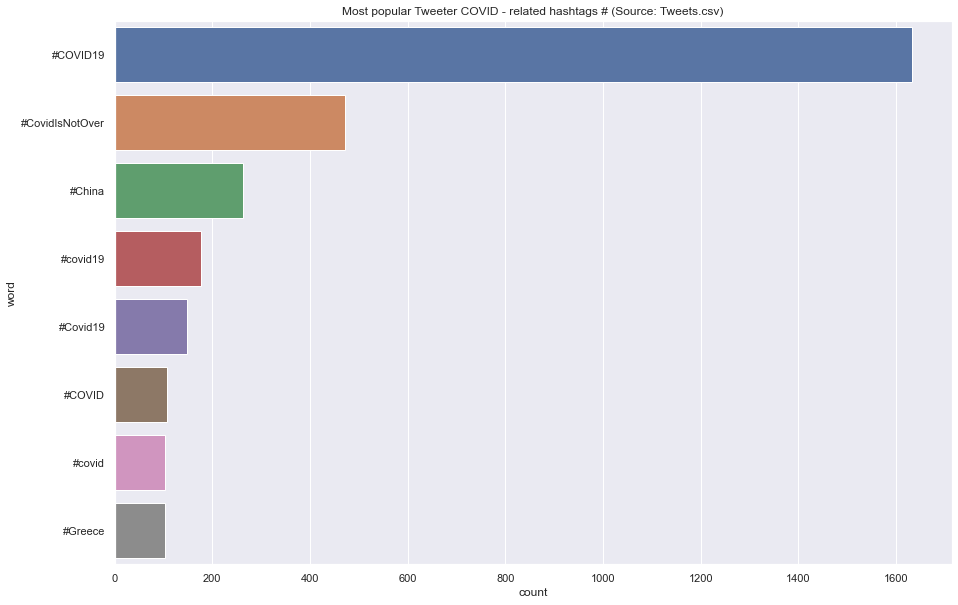

In [406]:
# Plot records with count>100, using seaborn barplot with y set to 'words'.
covidplot6 = ax = sns.barplot(x='count', y='word', data=data.loc[(data['count']>100)])
plt.title('Most popular Tweeter COVID - related hashtags # (Source: Tweets.csv)')

In [414]:
covidplot6.figure.savefig('covidplot6.png', bbox_inches='tight')

### Sneak peek into a more in-depth Tweeter file analysis (Source: Norah Wulff, 2022)

- Use advance libraries to analyse creators, trends or sentiment analysis.
- In this example, we will try to determine whether there are any frequently occurring words 'stop words' that can be used to refine future searches through a manually created list. Having more time we would use NLKT

https://raw.githubusercontent.com/igorbrigadir/stopwords/master/en/terrier.txt


In [197]:
# Manual list of stopwords to be removed in our example.

sw_list = ['a', 'about', 'actually', 'almost', 'also', 'although', 'always', 'am', 'an', 'and',
          'any', 'are', 'as', 'at', 'be', 'became', 'become', 'but', 'by', 'can', 'could', 'did', 
          'do', 'does', 'each', 'either', 'else', 'for', 'from', 'had', 'has', 'have', 'hence', 
          'how', 'i', 'if', 'in', 'is', 'it', 'its', 'just', 'may', 'maybe','me', 'might', 'mine', 
          'must', 'my', 'neither', 'nor', 'not', 'of', 'oh', 'ok', 'when', 'whenever', 'where',
          'whereas', 'wherever', 'whether', 'which', 'while', 'who', 'whoever', 'whom', 'whose', 
          'why', 'will', 'with', 'within', 'without', 'would', 'yes', 'yet', 'you', 'your', 'to',
          'the', 'of', 'and', 'are', 'was', 'this', 'on', 'now', 'over', 'us', 'so', 'more', 'our',
          'they', 'we', 'after', 'or', 'no', 'still', 'day', 'out', 'our', 'one', 'all', '&amp;',
          '-', '|', 'that', ' ']

# Loading an external file of stop words:
# URL = 'https://raw.githubusercontent.com/igorbrigadir/stopwords/master/en/terrier.txt?raw=True'
# external_stopwords = pd.read_csv(URL).values.tolist()

In [201]:
# Convert the text of the tweets to a list of tweets.
tweets_text_values = tweets_text.values

# Convert each of the tweets to a list of words.
tweets_text_values_words = [x.split(' ') for x in tweets_text_values]

# Create empty list
tweets_text_values_words_all = []

# Append to the list and remove http, mentions, and, selected keywords
tweets_text_values_words_all = [z for y in tweets_text_values_words for z in y if 'http' not in z\
                                and not z.startswith(('@', '#')) and z.lower() not in sw_list]
# Create a series with the value counts of keywords identified
tweets_text_values_words_all = pd.Series(tweets_text_values_words_all).value_counts()

In [202]:
# Display the first 50 entries of the Series
tweets_text_values_words_all.head(50)

               1738
Covid           348
people          303
Greece          275
COVID-19        267
cases           228
Athens,         211
Athens          209
new             205
COVID           198
been            185
Covid-19        153
being           152
vaccine         147
COVID19         143
up              142
China           141
covid           140
their           135
per             126
like            125
I’m             125
way             124
were            123
cause           118
get             118
New             111
safe            111
via             110
first           108
pandemic        106
Please          104
until           100
join            100
–                99
during           99
than             98
said             97
protection       96
reported         95
Coronavirus      94
sign             91
Deaths           90
safe.            90
Health           89
positive         88
stand            87
some             86
urging           86
urgently         86


In [343]:
# Use these series to create a new dataframe in preparation for visualisation.

# Let's use all the words up to risk and remove the white space.
data_t = pd.DataFrame(tweets_text_values_words_all.head(16)).reset_index()

# Rename the columns and display the result.
data_t.columns=['word', 'count']

data_t = data_t[data_t['word'].str.strip('word') !='']
data_t

word  count
1      Covid    348
2     people    303
3     Greece    275
4   COVID-19    267
5      cases    228
6    Athens,    211
7     Athens    209
8        new    205
9      COVID    198
10      been    185
11  Covid-19    153
12     being    152
13   vaccine    147
14   COVID19    143
15        up    142

Text(0.5, 1.0, 'Most popular words on Tweets.csv file after "stop words" cleaning (Source: Norah Wulff, 2022)')

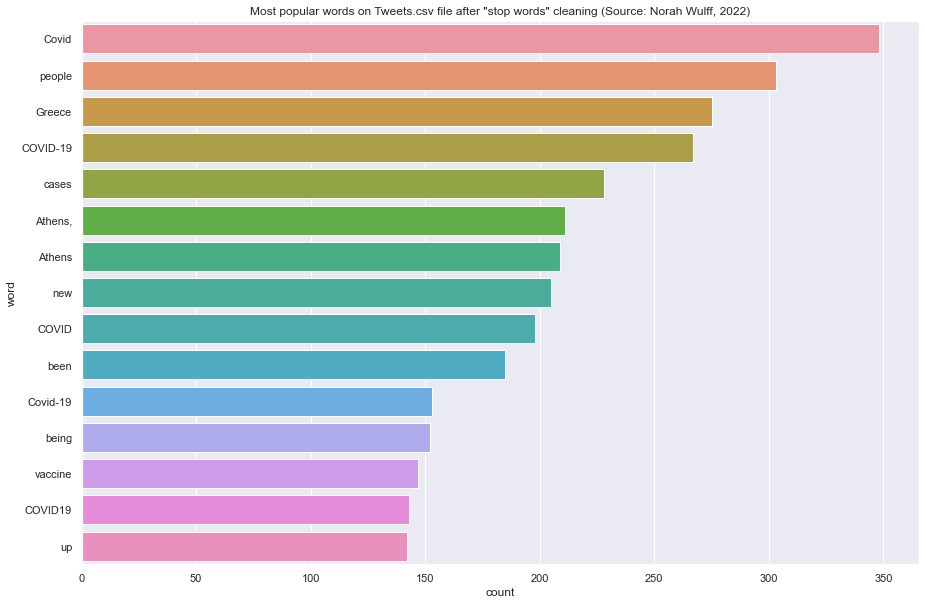

In [409]:
# Plot this new dataframe.
covidplot7 = sns.barplot(x='count', y='word', data=data_t)
plt.title('Most popular words on Tweets.csv file after "stop words" cleaning (Source: Norah Wulff, 2022)')

In [413]:
covidplot7.figure.savefig('covidplot7.png', bbox_inches='tight')

- Final step, review of the content of tweets containing selected keywords. In this case, 'cases' and 'risks'

In [206]:
dft = pd.DataFrame(tweets_text_values)
dft.columns = ['Tweets']

In [209]:
# Let's create a subset dataframe containing only tweets with the selected keywords 'cases' 'risk'.
subset = dft[dft['Tweets'].str.contains('cases', 'risk')]

# Loop through the dataframe and print each element.
for i in subset.index:
    print('Tweet: ', i)
    print(subset.loc[i, 'Tweets'], '\n')

Tweet:  38
More than 90% of those infected with COVID-19 show no symptoms
but the rest of the infected cases had either Type 2 diabetes, cardiovascular diseases, hypertension, and/or cancer, which means people with obesity  show severe symptoms.
#paraphrase
#COVID19
https://t.co/ZEtNx7f4jE 

Tweet:  65
The CDC investigates mysterious cases of #PediatricHepatitis. Find out about this and more, including stories on diabetes' effect on #COVID19 outcomes and prioritization of future #cancer prevention for adolescent and young adult cancer survivors.
https://t.co/VlHgXy6Afg 

Tweet:  77
Pregnant women have a low risk of having severe symptoms; however, in some cases -- especially those with obesity or gestational diabetes, or who are old, or who have underlying diseases -- they may have severe symptoms. 

#COVID19 https://t.co/4SG3GAMx04 

Tweet:  190
Public Health Ontario's latest data on #COVID19 cases in ON, incl TO, is now available: https://t.co/oUxcc69p2S. 

TPH's case counts dashboar

In [210]:
# Let's run the loop again with the selected keywords 'covid'.
subset2 = dft[dft['Tweets'].str.contains('covid')]

# Loop through the dataframe and print each element.
for i in subset2.index:
    print('Tweet: ', i)
    print(subset2.loc[i, 'Tweets'], '\n')

Tweet:  4
Advanced healthcare at your fingertips
https://t.co/aUQ93qFsJ4 | +443333053358
#slough #sloughtownfc #sloughtown #sloughi #windsor #windsorcastle #diabetes #physician #generalphysician
#hospital #covid19 #medical #medicine #bloodtest #GP https://t.co/QFKpPxsWzU 

Tweet:  5
Deciphering ADA 2021: Minimize Risks for People with Diabetes in COVID-19   by Dr. G Shanmugan Sundar
#trd #ADA2021 #covid19 #diabetes 
Watch full video here: https://t.co/sr3uKjK9zo https://t.co/fw3frVHEXY 

Tweet:  12
All of our doctors are board certified specialist and are here to help you 7 days a week.

#xrays #bloodtests #diabetes  #flushots #cold #immunizations #tlcmedical #dotphysical #dotexam #immigrationmedical #urgentcare #medical #walkinclinic #coronavirus #covid19 #fluseason https://t.co/tCgyhqJ4Vi 

Tweet:  14
My grandfather told me that the reason he is still alive and healthy with no high blood pressure,covid19 diabetes,ulcers,kidney failure,cancer is avoiding listening to m7 and nrm offici

# Part 6: Time-series analysis on deaths/recovered x province

In [349]:
# Let's ensure we have all the libraries and settings we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Let's work on timeseries re deaths/recovered - first within the Channel Islands province

In [215]:
covid_lean.tail()

Province/State       Date  Vaccinated  First Dose  Second Dose    Deaths  \
7579         Others 2021-10-10        1070        1216         1070  137735.0   
7580         Others 2021-10-11        1300        1604         1300  137763.0   
7581         Others 2021-10-12        1482        2027         1482  137944.0   
7582         Others 2021-10-13           0           0            0  138080.0   
7583         Others 2021-10-14           0           0            0  138237.0   

          Cases  Recovered  Hospitalised  Missing Second Dose      Month  Year  
7579  8154306.0        0.0         378.0                  146 2021-10-01  2021  
7580  8193769.0        0.0         386.0                  304 2021-10-01  2021  
7581  8231437.0        0.0         386.0                  545 2021-10-01  2021  
7582  8272883.0        0.0           0.0                    0 2021-10-01  2021  
7583  8317439.0        0.0           0.0                    0 2021-10-01  2021

In [351]:
# Data just from the Channel Islands 'Province'
covid_channel = covid_lean[covid_lean['Province/State'] == 'Channel Islands']
print(covid_channel.shape)
covid_channel.tail()

(632, 12)


Province/State       Date  Vaccinated  First Dose  Second Dose  Deaths  \
3155  Channel Islands 2021-10-10        1362        1547         1362   100.0   
3156  Channel Islands 2021-10-11        1654        2042         1654   100.0   
3157  Channel Islands 2021-10-12        1886        2579         1886   100.0   
3158  Channel Islands 2021-10-13           0           0            0   100.0   
3159  Channel Islands 2021-10-14           0           0            0   100.0   

        Cases  Recovered  Hospitalised  Missing Second Dose      Month  Year  
3155  11843.0        0.0         481.0                  185 2021-10-01  2021  
3156  11968.0        0.0         491.0                  388 2021-10-01  2021  
3157  12017.0        0.0         491.0                  693 2021-10-01  2021  
3158  12072.0        0.0           0.0                    0 2021-10-01  2021  
3159  12135.0        0.0           0.0                    0 2021-10-01  2021

In [221]:
# Data just from the Channel Islands 'Province' on deaths by COVID

covid_channel_deaths = covid_channel[['Date', 'Deaths']]
covid_channel_deaths.tail()

Date  Deaths
3155 2021-10-10   100.0
3156 2021-10-11   100.0
3157 2021-10-12   100.0
3158 2021-10-13   100.0
3159 2021-10-14   100.0

Text(0.5, 1.0, 'Evolution in time of COVID related deaths in the English Channels province')

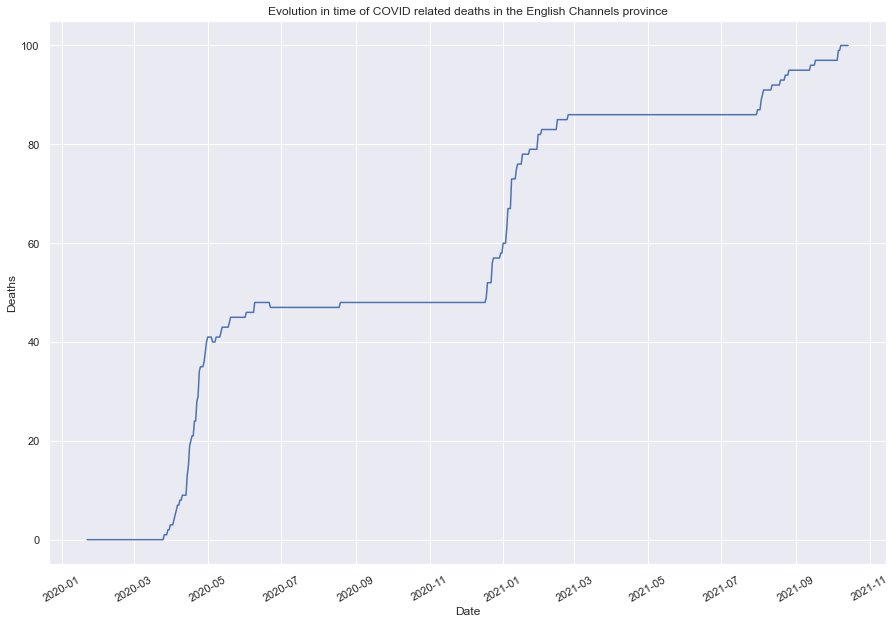

In [358]:
covidplot8 = sns.lineplot(x='Date', y='Deaths', data=covid_channel_deaths, ci=None)
plt.xticks(rotation=30)
plt.title('Evolution in time of COVID related deaths in the English Channels province')

In [412]:
covidplot8.figure.savefig('covidplot8.png', bbox_inches='tight')

In [231]:
# Data just from the Channel Islands 'Province' on hospitalisation by COVID.

covid_channel_hospital = covid_channel[['Date', 'Hospitalised']]
covid_channel_hospital.tail(9)

Date  Hospitalised
3151 2021-10-06         479.0
3152 2021-10-07         475.0
3153 2021-10-08         473.0
3154 2021-10-09         469.0
3155 2021-10-10         481.0
3156 2021-10-11         491.0
3157 2021-10-12         491.0
3158 2021-10-13           0.0
3159 2021-10-14           0.0

Text(0.5, 1.0, 'Evolution on time of COVID related hospitalisations in the English Channels province')

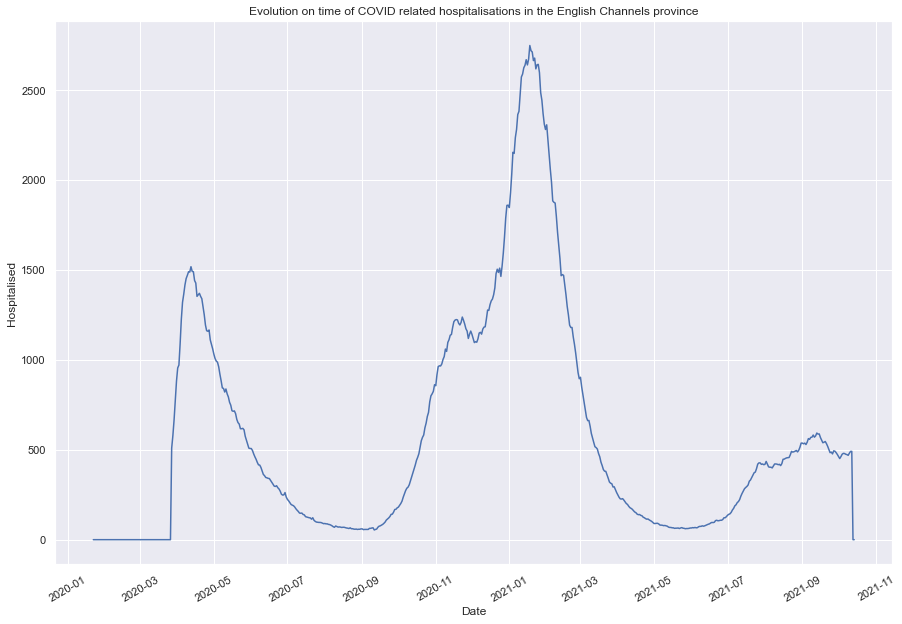

In [355]:
covidplot9 = sns.lineplot(x='Date', y='Hospitalised', data=covid_channel_hospital, ci=None)
plt.xticks(rotation=30)
plt.title('Evolution on time of COVID related hospitalisations in the English Channels province')

In [415]:
covidplot9.figure.savefig('covidplot9.png', bbox_inches='tight')

In [363]:
# Let's index the date.

covid_channel_hospital_index = covid_channel_hospital.set_index('Date')
covid_channel_hospital_index.tail(9)

# Create a rolling window of 2 days to calculate the rolling mean using the series.rolling function.
rolling_calc = covid_channel_hospital_index.rolling(window=2).mean()
rolling_calc.tail(10)

Hospitalised
Date                    
2021-10-05         477.5
2021-10-06         479.5
2021-10-07         477.0
2021-10-08         474.0
2021-10-09         471.0
2021-10-10         475.0
2021-10-11         486.0
2021-10-12         491.0
2021-10-13         245.5
2021-10-14           0.0

Text(0.5, 1.0, 'Evolution (moving average window=2) on time of COVID related hospitalisations in the English Channels province')

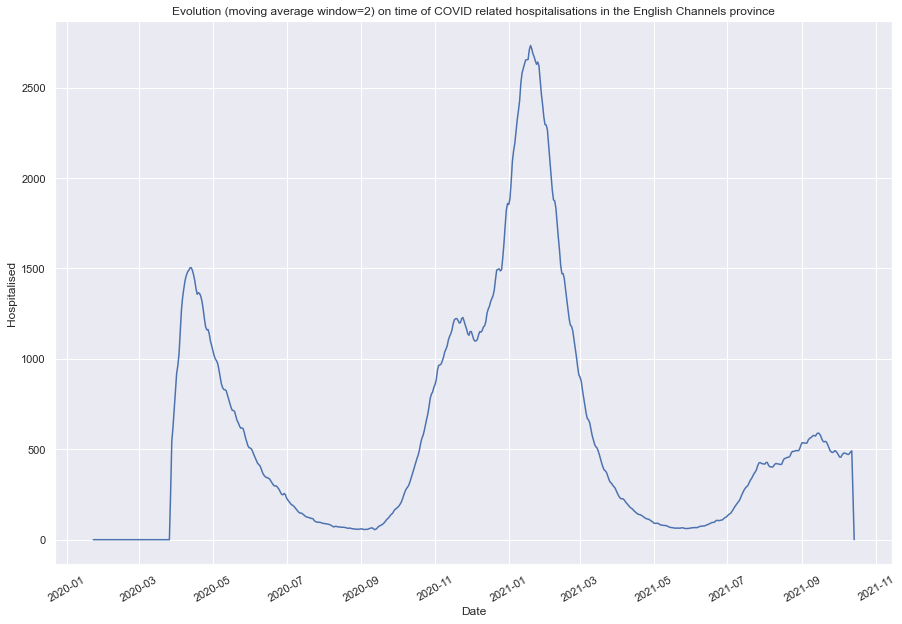

In [364]:
#Let's plot the rolling mean on hospitalised
covidplot10 = sns.lineplot(x='Date', y='Hospitalised', data=rolling_calc, ci=None)
plt.xticks(rotation=30)
plt.title('Evolution (moving average window=2) on time of COVID related hospitalisations \
in the English Channels province')

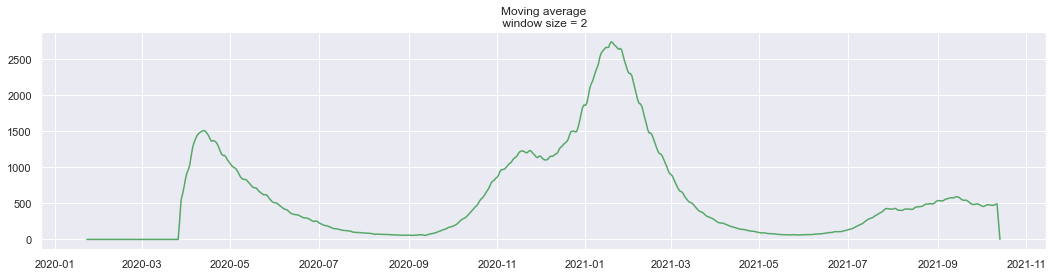

In [365]:
# Chaging slightly the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
plt.figure(figsize=(18,4))
plt.title('Moving average\n window size = {}'.format(2))
plt.plot(rolling_calc, 'g', label='Simple moving average trend')

In [366]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

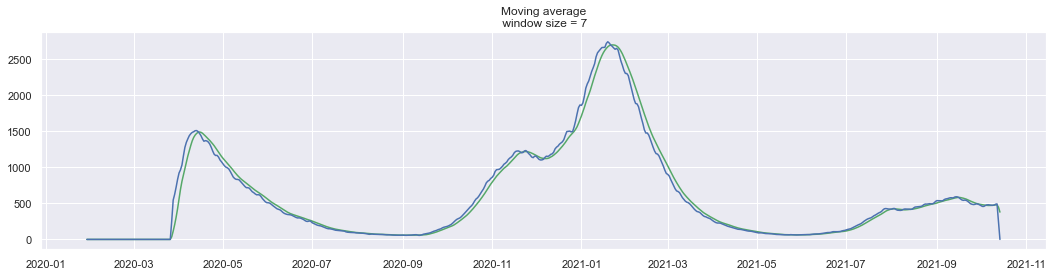

In [381]:
covidplot10=plot_moving_average(rolling_calc, 7, plot_intervals=False, scale=1.96)

In [273]:
def mean_absolute_error(a, b): return abs(b - a)

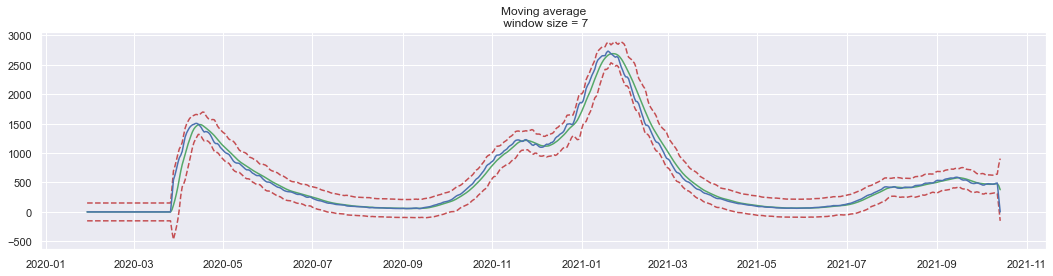

In [274]:
plot_moving_average(rolling_calc, 7, plot_intervals=True, scale=1.96)

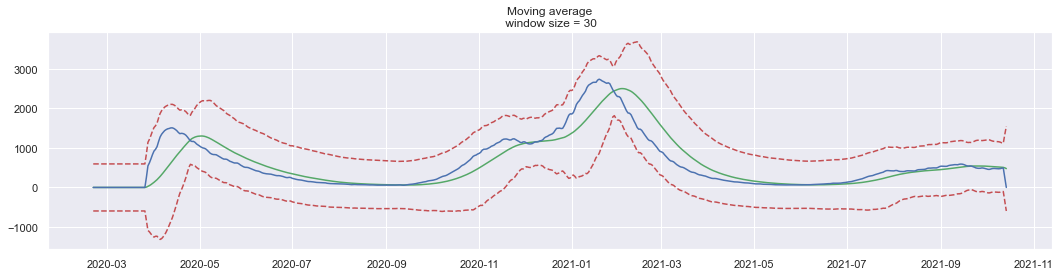

In [418]:
# Changing the MA window to 30, 60 or 90 days.

plot_moving_average(rolling_calc, 30, plot_intervals=True, scale=1.96)

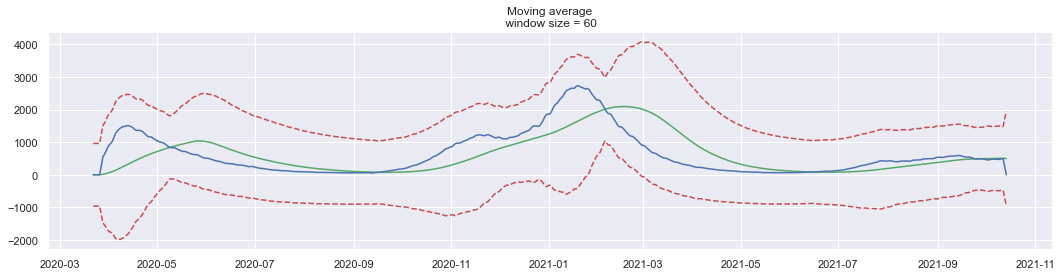

In [419]:
plot_moving_average(rolling_calc, 60, plot_intervals=True, scale=1.96)

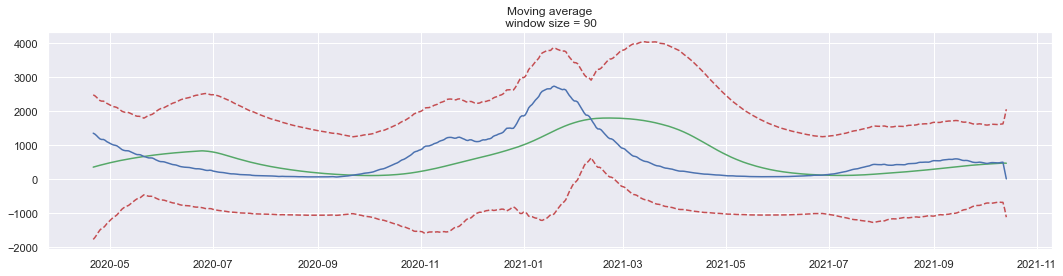

In [420]:
plot_moving_average(rolling_calc, 90, plot_intervals=True, scale=1.96)

In [276]:
# Top three days with biggest difference between daily value and rolling 7-day mean
s = rolling_calc.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

Hospitalised       error
Date                                
2020-03-28         544.0  429.928571
2020-03-29         623.0  419.928571
2020-03-30         722.0  415.785714

### Insights after questions from project management
- **Question 1**: We have heard of both qualitative and quantitative data from the previous consultant. What are the differences between the two? Should we use only one or both of these types of data and why? How can these be used in business predictions? Could you provide examples of each?
- **Question 2**: We have also heard a bit about the need for continuous improvement. Why should this be implemented, it seems like a waste of time. Why can’t we just implement the current project as it stands and move on to other pressing matters?
- **Question 3**: As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Have we covered everything from a data ethics standpoint? Is there anything else we need to implement from a data ethics perspective? 

### Answer 1: In short, qualitative (categorical) data is based on groups, interpretation, and description. For example, gender, eye colour, binary data (yes or no) and so forth. Quantitative data is numeric and portrayed by ordinal, interval or ratio scales and lends itself to most statistical manipulation. For example, the height of a tree, the distance of planets from the earth, temperature and distance measurements. 

Therefore, quantitative data tells you how many, how much, or how often using calculations, while qualitative (categorical) data can help you understand why, how, or what happened behind certain behaviours.

Both can be used in business predictions as both complement each other. Everything depends on how frequent forecasts are needed, availability of data and budget, and maturity of the project at hand.

### Answer 2: All the contrary. In fact, it should be given high priority to minimise risks and stay ahead of the curve for the next peak or the next pandemic. 

It is more cost effective and reduces risks considerably commiting to small but impactful changes now than start a project from the beginning later on. It also can help gather more reliable insights to inform business decision-making.

### Answer 3: from a data ethics perspective, it would be recommended:
1. Staying vigilant and ahead of the curve with new ammendments to the current legislation (Data Protection Act 2018 (DPA 2018), and UK General Data Protection Regulation (UK GDPR) 'https://ico.org.uk/for-organisations/guide-to-data-protection/).
2. Ensure there is an active Data Ethics Framework in place aligned with the government vision & values, tested and embedded into the daily business operations. This would ensure a clearly defined ownership and accountability derived of any data management.
3. Promote a culture of communication and improvement through forums of discussion to welcome open and honest feedback on current data practices and how to improvement. Potential possibility to create a Community of Data Ethics Practice.

### Thank you very much for reading!